## Analytics & Insights

### Environment Setup & Data Loading

#### Python Libraries

In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
!pip install contextily
import contextily as ctx
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from shapely.geometry import Point
!pip install pgeocode
!pip install folium
!pip install pandas
!pip install openpyxl
!pip install geopandas
import requests
import folium
from folium.plugins import MarkerCluster
import geopy.distance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.4 MB/s eta 0:00:00


#### Loading Preprocessed Data

In [2]:
# Load the Excel file (Preprocessed Data after EDA)
file_path = r"/content/Circadian_Trust_Cleaned_Data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl') # Use openpyxl engine to handle encoding

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site               7311 non-null   object        
 1   Gender             7311 non-null   object        
 2   Postcode           7311 non-null   object        
 3   Plan               7310 non-null   object        
 4   Age                7311 non-null   int64         
 5   Signing/Join Date  7311 non-null   datetime64[ns]
 6   Center             7311 non-null   object        
 7   Original_Postcode  7311 non-null   object        
 8   Original_Plan      7310 non-null   object        
 9   Membership_Type    7311 non-null   object        
 10  12 Month           5442 non-null   object        
 11  3 Month            1191 non-null   object        
 12  Month to Month     376 non-null    object        
 13  Other Membership   301 non-null    object        
dtypes: datet

Site Gender  Postcode                                             Plan  Age  \
0   LG      F  BS16 6HQ        12 Month Lifestyle On Referral Membership   78   
1   LG      M  BS30 8GT    12 Month Total Lifestyle Corporate Membership   37   
2   LG      F  BS15 9UW  12 Month Total Lifestyle Older Adult Membership   72   
3   LG      F  BS15 3PH    12 Month Total Lifestyle Corporate Membership   51   
4   LG      F   BS5 8JE    12 Month Total Lifestyle Corporate Membership   57   

  Signing/Join Date          Center Original_Postcode  \
0        2015-07-03  Longwell Green          BS16 6HQ   
1        2015-07-03  Longwell Green          BS30 8GT   
2        2015-07-06  Longwell Green          BS15 9UW   
3        2015-07-09  Longwell Green          BS15 3PH   
4        2015-07-09  Longwell Green           BS5 8JE   

                                     Original_Plan Membership_Type  \
0        12 Month Lifestyle On Referral Membership        12 Month   
1    12 Month Total Lifestyle Corporate Membership        12 Month   
2  12 Month Total Lifestyle Older Adult Membership        12 Month   
3    12 Month Total Lifestyle Corporate Membership        12 Month   
4    12 Month Total Lifestyle Corporate Membership        12 Month   

                                          12 Month 3 Month Month to Month  \
0        12 Month Lifestyle On Referral Membership     NaN            NaN   
1    12 Month Total Lifestyle Corporate Membership     NaN            NaN   
2  12 Month Total Lifestyle Older Adult Membership     NaN            NaN   
3    12 Month Total Lifestyle Corporate Membership     NaN            NaN   
4    12 Month Total Lifestyle Corporate Membership     NaN            NaN   

  Other Membership  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

### OBJECTIVE 1: Customer Demographic Insights & Behavioral Trends by Balwinder Singh

#### Customer Distribution Across Centers

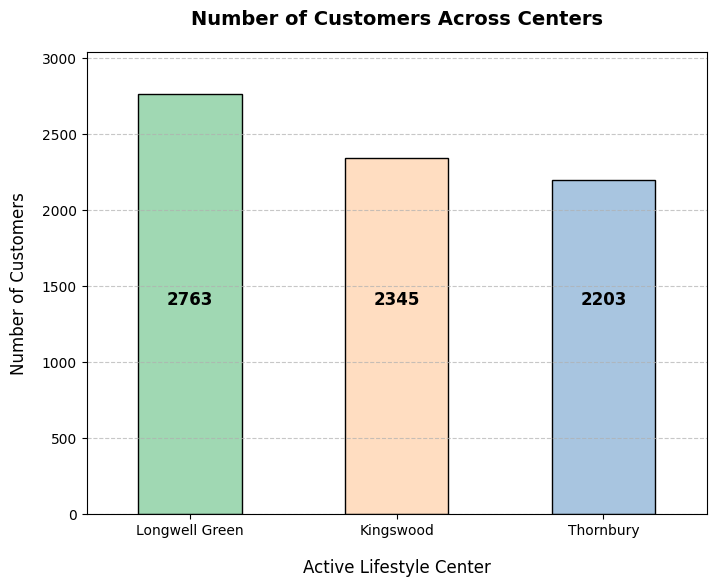

In [4]:
# Define center-wise customer count
center_counts = df["Center"].value_counts()

# Define pastel colors for the centers
center_colors = ["#A0D8B3", "#FFDDC1", "#A8C5E0"]  # Pastel Green, Light Peach, Soft Blue

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = center_counts.plot(kind="bar", color=center_colors, edgecolor="black")

# Adjust the position of text labels inside bars at equal height w.r.t. each other
text_y_position = max(center_counts) * 0.50  # Keeping text labels at 50% of max value

for i, count in enumerate(center_counts):
    ax.text(i, text_y_position, str(count), ha="center", fontsize=12, fontweight="bold", color="black")

# Set chart aesthetics
ax.set_title("Number of Customers Across Centers", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("Active Lifestyle Center", fontsize=12, labelpad=15)  # Increased label padding
ax.set_ylabel("Number of Customers", fontsize=12, labelpad=10)
plt.xticks(rotation=0)  # Keep center names horizontal
plt.ylim(0, max(center_counts) * 1.1)  # Set y-axis limit to add spacing at the top
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

#### Gender-Based Analysis

In [5]:
# Calculate gender counts
gender_counts = df["Gender"].value_counts()

# Calculate percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Create a DataFrame for better presentation
gender_summary = pd.DataFrame({
    "Count": gender_counts.astype(int),  # Ensure integers
    "Percentage": gender_percentages.round(1)  # Round percentages to 1 decimal place
})

# Print summary
print("\nTotal Gender Distribution:\n")
print(gender_summary)


Total Gender Distribution:

        Count  Percentage
Gender                   
F        4473        61.2
M        2838        38.8


In [6]:
# Calculate gender counts per center
gender_center_counts = df.groupby(["Center", "Gender"]).size().unstack()

# Calculate percentages
gender_center_percentages = gender_center_counts.div(gender_center_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
gender_center_summary = gender_center_counts.astype(int).copy()  # Ensure counts are integers

for gender in gender_center_counts.columns:
    gender_center_summary[f"{gender} (%)"] = gender_center_percentages[gender].round(1)  # Round percentages

# Print summary
print("\nCenter-Wise Gender Distribution:\n")
print(gender_center_summary)


Center-Wise Gender Distribution:

Gender             F     M  F (%)  M (%)
Center                                  
Kingswood       1433   912   61.1   38.9
Longwell Green  1715  1048   62.1   37.9
Thornbury       1325   878   60.1   39.9


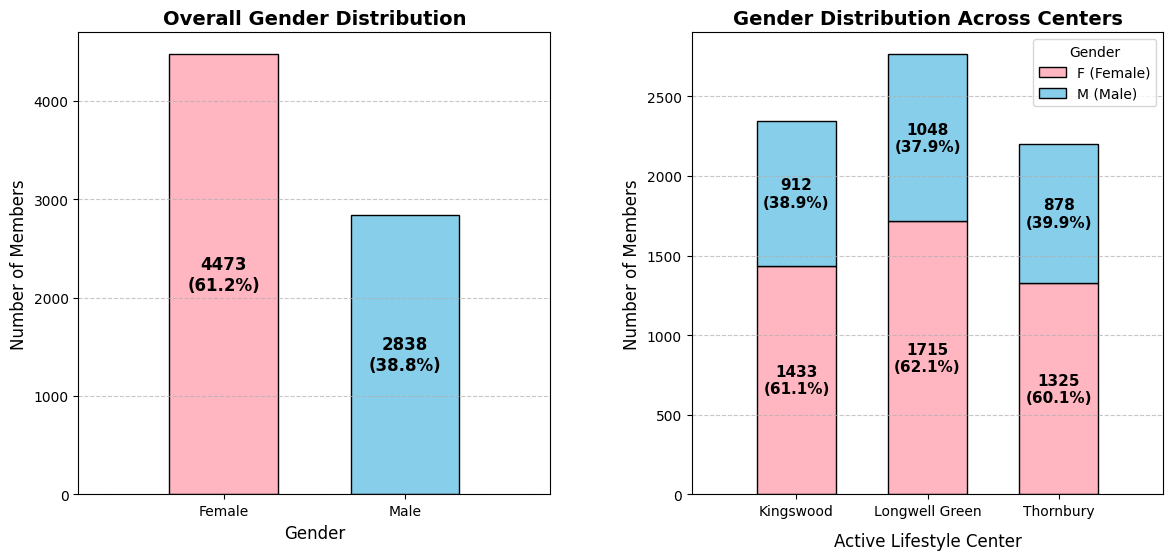

In [7]:
# Define colors (Females = Pink, Males = Blue)
colors = ["#FFB6C1", "#87CEEB"]

# Create figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'wspace': 0.3})  # Adjust wspace for wider gaps

# Adjusting bar width to maintain uniformity
bar_width = 0.6  # Adjust width to maintain proportional spacing

# Overall gender distribution
bars1 = axes[0].bar(gender_counts.index, gender_counts.values, color=colors, edgecolor="black", width=bar_width)

# Add text labels inside bars for counts & percentages
total_members = gender_counts.sum()
for bar, (gender, count) in zip(bars1, gender_counts.items()):
    percentage = (count / total_members) * 100
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{int(count)}\n({percentage:.1f}%)",
                 ha="center", va="center", fontsize=12, fontweight="bold")

# Aesthetics for overall gender distribution
axes[0].set_title("Overall Gender Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Gender", fontsize=12)
axes[0].set_ylabel("Number of Members", fontsize=12)
axes[0].set_xticks(range(len(gender_counts.index)), labels=["Female", "Male"])
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_xlim(-0.8, len(gender_counts.index) - 0.2)  # Increased gap on edges

# Center-wise gender distribution (stacked bar chart)
bars2 = gender_center_counts.plot(kind="bar", stacked=True, color=colors, ax=axes[1], edgecolor="black", width=bar_width)

# Add text labels inside bars for counts & percentages
for i, center in enumerate(gender_center_counts.index):
    total = gender_center_counts.loc[center].sum()
    for j, gender in enumerate(gender_center_counts.columns):
        count = gender_center_counts.loc[center, gender]
        percentage = gender_center_percentages.loc[center, gender]
        y_position = count / 2 if gender == "F" else gender_center_counts.loc[center, "F"] + (count / 2)
        axes[1].text(i, y_position, f"{int(count)}\n({percentage:.1f}%)",
                     ha="center", va="center", fontsize=11, color="black", fontweight="bold")

# Aesthetics for center-wise distribution
axes[1].set_title("Gender Distribution Across Centers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Active Lifestyle Center", fontsize=12, labelpad=10)
axes[1].set_ylabel("Number of Members", fontsize=12)
axes[1].legend(title="Gender", labels=["F (Female)", "M (Male)"])
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust x-limits for better spacing
axes[1].set_xlim(-0.8, len(gender_center_counts.index) - 0.2)

# Show updated plots
plt.show()

#### Age-Based Analysis

In [8]:
# Print basic statistics of the Age column
age_stats = df["Age"].describe()
print(age_stats)

count    7311.000000
mean       48.299549
std        15.593090
min        15.000000
25%        36.000000
50%        48.000000
75%        60.000000
max       125.000000
Name: Age, dtype: float64


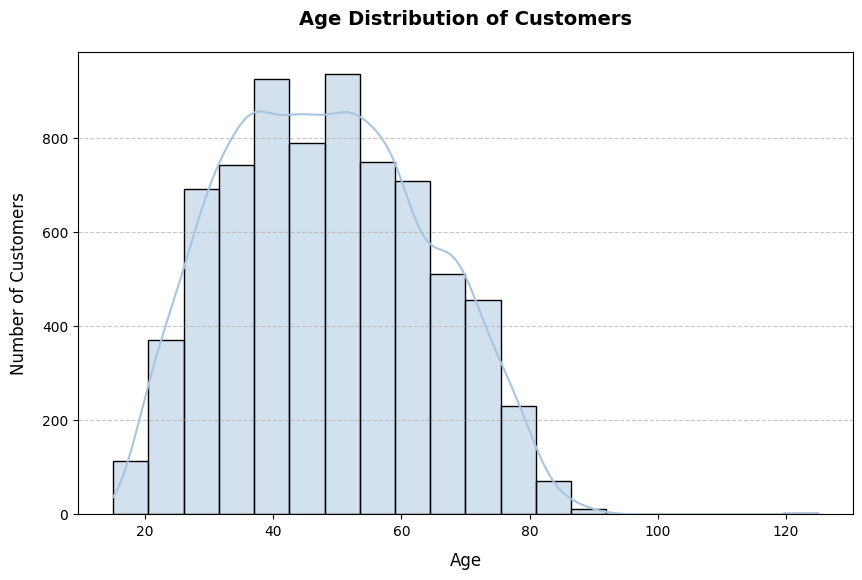

In [9]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram for age distribution
sns.histplot(df["Age"], bins=20, kde=True, color="#A8C5E0", edgecolor="black")

# Chart aesthetics
plt.title("Age Distribution of Customers", fontsize=14, fontweight="bold", pad=20)
plt.xlabel("Age", fontsize=12, labelpad=10)
plt.ylabel("Number of Customers", fontsize=12, labelpad=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [10]:
# Define age bins from 70 to 130 in 10-year intervals
age_bins = list(range(70, 131, 10))

# Print the number of customers in each age group
print("\nCustomer Count in Higher Age Groups (for Outlier Justification):")
for start_age in age_bins:
    end_age = start_age + 10
    count = ((df["Age"] >= start_age) & (df["Age"] < end_age)).sum()
    print(f"Customers in age group {start_age}-{end_age}: {count}")


Customer Count in Higher Age Groups (for Outlier Justification):
Customers in age group 70-80: 653
Customers in age group 80-90: 115
Customers in age group 90-100: 2
Customers in age group 100-110: 0
Customers in age group 110-120: 0
Customers in age group 120-130: 3
Customers in age group 130-140: 0


In [11]:
# Remove outliers above 90
df_filtered = df[df["Age"] <= 90]

# Basic statistics
age_summary = df_filtered["Age"].describe()
print(age_summary)

count    7307.000000
mean       48.262077
std        15.511258
min        15.000000
25%        36.000000
50%        48.000000
75%        60.000000
max        90.000000
Name: Age, dtype: float64


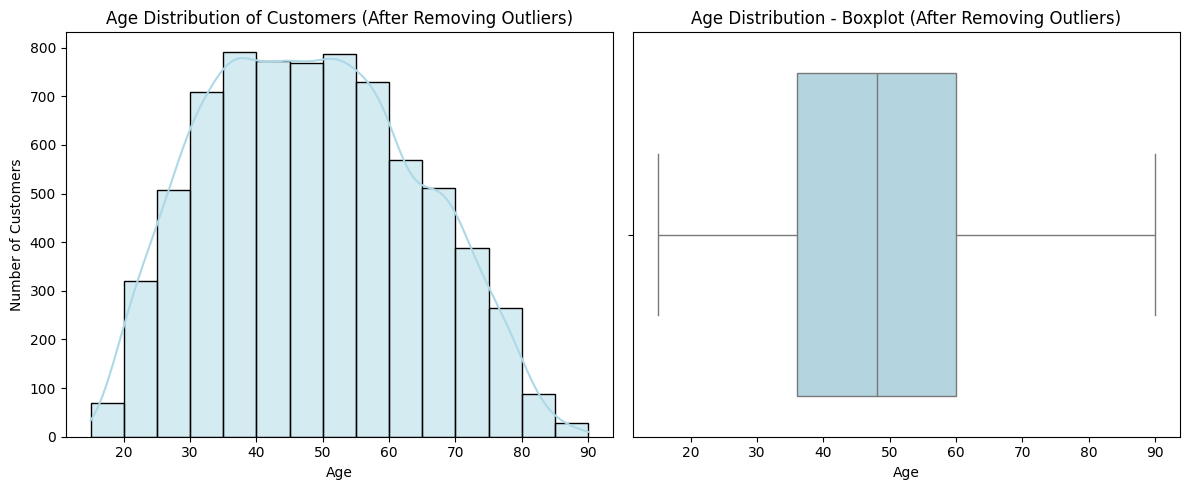

In [12]:
# Create figure for both plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with KDE
sns.histplot(df_filtered["Age"], bins=15, kde=True, color="lightblue", edgecolor="black", ax=axes[0])
axes[0].set_title("Age Distribution of Customers (After Removing Outliers)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Customers")

# Boxplot
sns.boxplot(x=df_filtered["Age"], color="lightblue", ax=axes[1])
axes[1].set_title("Age Distribution - Boxplot (After Removing Outliers)")
axes[1].set_xlabel("Age")

plt.tight_layout()
plt.show()

                            Count  Percentage
Age Group                                    
Young Adults (18-24)          389    5.323662
Adults (25-45)               2781   38.059395
Middle-aged Adults (45-65)   2856   39.085808
Seniors (65+)                1280   17.517449


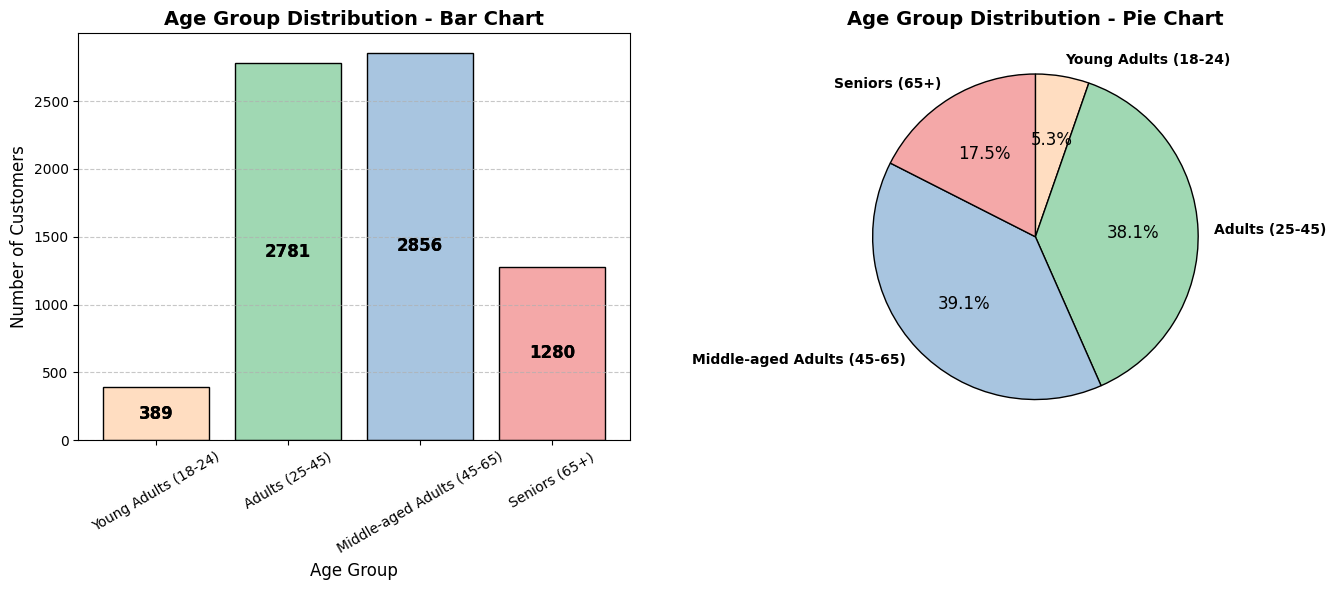

In [13]:
# Categorizing into specified age groups based on segmentation image

# Ensure df_filtered is a separate copy to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Categorizing age into specified age groups
bins = [15, 24, 44, 64, 90]  # Updated age groups
labels = ["Young Adults (18-24)", "Adults (25-45)", "Middle-aged Adults (45-65)", "Seniors (65+)"]
df_filtered["Age Group"] = pd.cut(df_filtered["Age"], bins=bins, labels=labels, right=True)

# Compute age group distribution
age_group_distribution = df_filtered["Age Group"].value_counts().sort_index()
age_group_percentages = (age_group_distribution / len(df_filtered)) * 100

# Create summary DataFrame
age_group_summary = pd.DataFrame({
    "Count": age_group_distribution,
    "Percentage": age_group_percentages
})

# Display the summary
print(age_group_summary)

# Extract counts & percentages
age_groups = age_group_summary.index.tolist()
counts = age_group_summary["Count"].tolist()
percentages = age_group_summary["Percentage"].tolist()

# Define colors for consistency
colors = ["#FFDDC1", "#A0D8B3", "#A8C5E0", "#F4A8A8"]

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart with rotated x-axis labels
bars = axes[0].bar(age_groups, counts, color=colors, edgecolor="black")
axes[0].set_title("Age Group Distribution - Bar Chart", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Age Group", fontsize=12)
axes[0].set_ylabel("Number of Customers", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines
axes[0].tick_params(axis='x', rotation=30)  # Rotate x-axis labels

# Add text labels inside bars
for bar, count in zip(bars, counts):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{count}",
                 ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# Add text labels inside bars
for bar, count in zip(bars, counts):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{count}",
                 ha="center", va="center", fontsize=12, fontweight="bold", color="black")


# Pie chart
wedges, texts, autotexts = axes[1].pie(
    percentages, labels=age_groups, autopct="%1.1f%%", colors=colors,
    wedgeprops={"edgecolor": "black", "linewidth": 1}, startangle=90, counterclock=False
)
axes[1].set_title("Age Group Distribution - Pie Chart", fontsize=14, fontweight="bold")

# Adjust text properties
for text in texts:
    text.set_fontweight("bold")
for autotext in autotexts:
    autotext.set_fontsize(12)

# Show the plot
plt.tight_layout()
plt.show()


**Center-wise Age Group Distribution (Count):**
Age Group       Young Adults (18-24)  Adults (25-45)  \
Center                                                 
Kingswood                         94            1079   
Longwell Green                   104            1079   
Thornbury                        118             696   
Total                            316            2854   

Age Group       Middle-aged Adults (45-65)  Seniors (65+)  
Center                                                     
Kingswood                              859            313  
Longwell Green                        1102            477  
Thornbury                              895            490  
Total                                 2856           1280  

**Center-wise Age Group Distribution (Percentage):**
Age Group       Young Adults (18-24)  Adults (25-45)  \
Center                                                 
Kingswood                   4.008529       46.012793   
Longwell Green              3.76

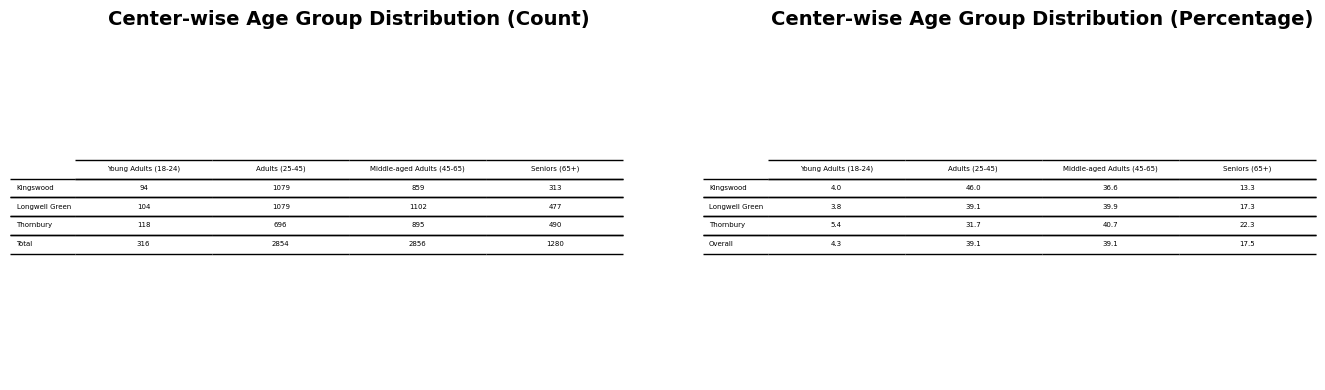

In [14]:
# Define new age group bins and labels
age_bins = [18, 24, 45, 65, 100]  # Corresponding to Young Adults, Adults, Middle-aged Adults, Seniors
age_labels = ["Young Adults (18-24)", "Adults (25-45)", "Middle-aged Adults (45-65)", "Seniors (65+)"]
df_filtered["Age Group"] = pd.cut(df_filtered["Age"], bins=age_bins, labels=age_labels, right=False)

# Compute center-wise distribution (Count)
center_age_distribution = df_filtered.groupby(["Center", "Age Group"], observed=False).size().unstack(fill_value=0)

# Compute percentage distribution
center_age_percentages = center_age_distribution.div(center_age_distribution.sum(axis=1), axis=0) * 100

# Add "Total" row to count distribution
center_age_distribution.loc["Total"] = center_age_distribution.sum()

# Add "Overall" row to percentage distribution
center_age_percentages.loc["Overall"] = center_age_distribution.loc["Total"] / center_age_distribution.loc["Total"].sum() * 100

# Display tables
print("\n**Center-wise Age Group Distribution (Count):**")
print(center_age_distribution)

print("\n**Center-wise Age Group Distribution (Percentage):**")
print(center_age_percentages)

# Create a figure for the tables
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Plot Count Table (with Total)
ax[0].axis("tight")
ax[0].axis("off")
count_table = ax[0].table(cellText=center_age_distribution.values,
                          colLabels=center_age_distribution.columns,
                          rowLabels=center_age_distribution.index,
                          cellLoc="center", loc="center",
                          colColours=["lightgrey"] * len(center_age_distribution.columns),
                          cellColours=[["#f5f5f5"] * len(center_age_distribution.columns) for _ in range(len(center_age_distribution))],
                          edges="horizontal")
ax[0].set_title("Center-wise Age Group Distribution (Count)", fontsize=14, fontweight="bold")

# Plot Percentage Table (with Overall)
ax[1].axis("tight")
ax[1].axis("off")
percent_table = ax[1].table(cellText=center_age_percentages.round(1).values,
                            colLabels=center_age_percentages.columns,
                            rowLabels=center_age_percentages.index,
                            cellLoc="center", loc="center",
                            colColours=["lightgrey"] * len(center_age_percentages.columns),
                            cellColours=[["#f5f5f5"] * len(center_age_percentages.columns) for _ in range(len(center_age_percentages))],
                            edges="horizontal")
ax[1].set_title("Center-wise Age Group Distribution (Percentage)", fontsize=14, fontweight="bold")

# Adjust layout and show tables
plt.tight_layout()
plt.show()

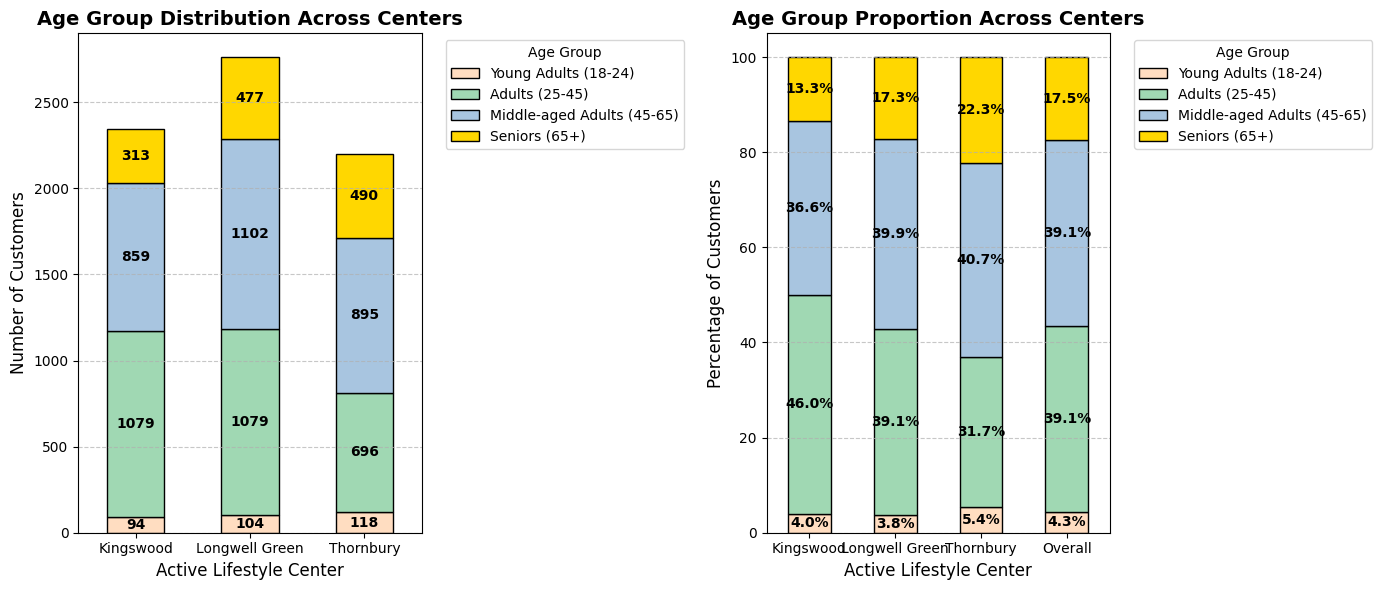

In [15]:
# Add "Overall" row to center_age_percentages for the percentage graph
center_age_percentages.loc["Overall"] = center_age_distribution.loc["Total"] / center_age_distribution.loc["Total"].sum() * 100

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define colors for age groups
age_group_colors = ["#FFDDC1", "#A0D8B3", "#A8C5E0", "#FFD700"]

# First chart: Stacked bar chart for count distribution (without Total)
center_age_distribution.drop("Total").plot(
    kind="bar", stacked=True, ax=axes[0], edgecolor="black", color=age_group_colors
)
axes[0].set_title("Age Group Distribution Across Centers", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Active Lifestyle Center", fontsize=12)
axes[0].set_ylabel("Number of Customers", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_xticklabels(center_age_distribution.index[:-1], rotation=0)

# Adjust legend placement
axes[0].legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add value labels to count chart
for bar in axes[0].containers:
    axes[0].bar_label(bar, fmt="%d", label_type="center", fontsize=10, fontweight="bold")

# Second chart: Stacked bar chart for percentage distribution (with Overall)
center_age_percentages.plot(
    kind="bar", stacked=True, ax=axes[1], edgecolor="black", color=age_group_colors
)
axes[1].set_title("Age Group Proportion Across Centers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Active Lifestyle Center", fontsize=12)
axes[1].set_ylabel("Percentage of Customers", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_xticklabels(center_age_percentages.index, rotation=0)

# Adjust legend placement
axes[1].legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add percentage labels to percentage chart
for bar in axes[1].containers:
    axes[1].bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, fontweight="bold")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

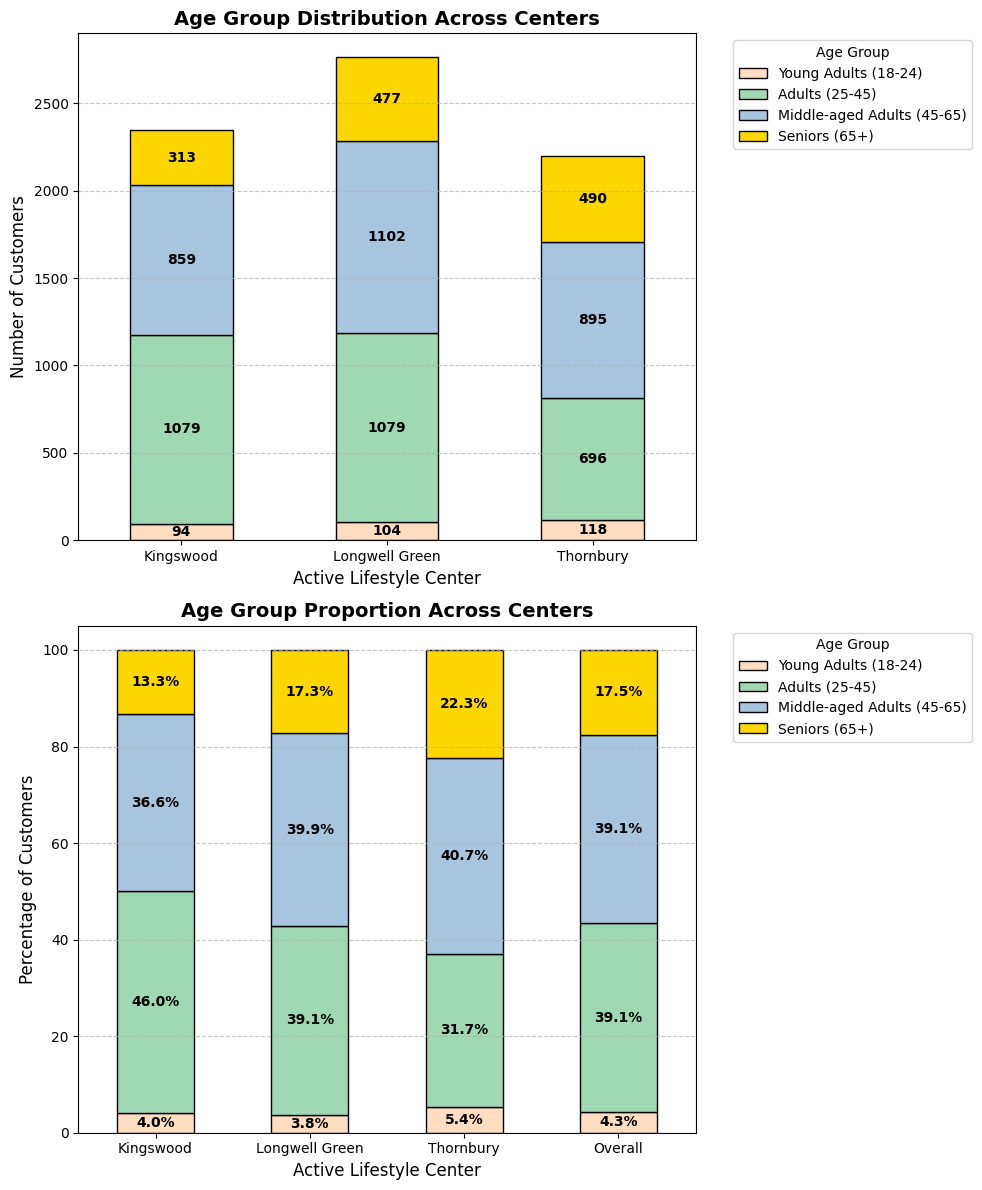

In [16]:
# Add "Overall" row to center_age_percentages for the percentage graph
center_age_percentages.loc["Overall"] = center_age_distribution.loc["Total"] / center_age_distribution.loc["Total"].sum() * 100

# Create figure with two rows and one column
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Define colors for age groups
age_group_colors = ["#FFDDC1", "#A0D8B3", "#A8C5E0", "#FFD700"]

# First chart: Stacked bar chart for count distribution (without Total)
center_age_distribution.drop("Total").plot(
    kind="bar", stacked=True, ax=axes[0], edgecolor="black", color=age_group_colors
)
axes[0].set_title("Age Group Distribution Across Centers", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Active Lifestyle Center", fontsize=12)
axes[0].set_ylabel("Number of Customers", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].set_xticklabels(center_age_distribution.index[:-1], rotation=0)

# Adjust legend placement
axes[0].legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add value labels to count chart
for bar in axes[0].containers:
    axes[0].bar_label(bar, fmt="%d", label_type="center", fontsize=10, fontweight="bold")

# Second chart: Stacked bar chart for percentage distribution (with Overall)
center_age_percentages.plot(
    kind="bar", stacked=True, ax=axes[1], edgecolor="black", color=age_group_colors
)
axes[1].set_title("Age Group Proportion Across Centers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Active Lifestyle Center", fontsize=12)
axes[1].set_ylabel("Percentage of Customers", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_xticklabels(center_age_percentages.index, rotation=0)

# Adjust legend placement
axes[1].legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add percentage labels to percentage chart
for bar in axes[1].containers:
    axes[1].bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, fontweight="bold")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Young Adults (18-24): 6.2%
Adults (25-45): 20.0%
Middle-aged Adults (45-65): 19.0%
Seniors (65+): 12.4%


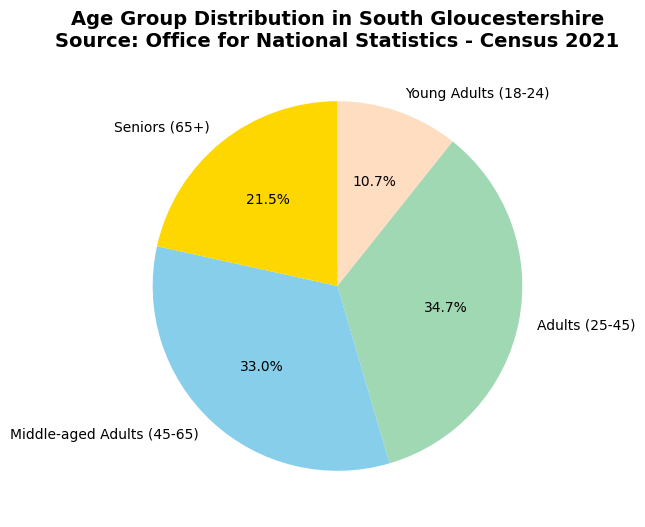

In [18]:
# Load the new Excel file and skip the first row (age numbers)
df = pd.read_excel('/content/Age_Distribution.xlsx', skiprows=1)

# Transpose the DataFrame to have age values as a column
df_transposed = df.T
df_transposed.columns = df_transposed.iloc[0]  # Set the first row as header
df_transposed = df_transposed[1:]  # Drop the first row

# Reset index and rename the columns for easier processing
df_transposed.reset_index(inplace=True)
df_transposed.columns = ["Age", "Population"]
df_transposed["Population"] = pd.to_numeric(df_transposed["Population"], errors="coerce")

# Convert age labels to integers where possible
df_transposed["Age"] = pd.to_numeric(df_transposed["Age"], errors="coerce")

# Calculate total population
total_population = df_transposed["Population"].sum()

# Define age group boundaries
young_adults = df_transposed[(df_transposed["Age"] >= 18) & (df_transposed["Age"] <= 24)]["Population"].sum()
adults = df_transposed[(df_transposed["Age"] >= 25) & (df_transposed["Age"] <= 45)]["Population"].sum()
middle_aged = df_transposed[(df_transposed["Age"] >= 45) & (df_transposed["Age"] <= 65)]["Population"].sum()
seniors = df_transposed[(df_transposed["Age"] > 65)]["Population"].sum()

# Calculate percentages
young_adults_percent = (young_adults / total_population) * 100
adults_percent = (adults / total_population) * 100
middle_aged_percent = (middle_aged / total_population) * 100
seniors_percent = (seniors / total_population) * 100

# Display calculated percentages
print(f"Young Adults (18-24): {young_adults_percent:.1f}%")
print(f"Adults (25-45): {adults_percent:.1f}%")
print(f"Middle-aged Adults (45-65): {middle_aged_percent:.1f}%")
print(f"Seniors (65+): {seniors_percent:.1f}%")

# Visualization
age_groups = ["Young Adults (18-24)", "Adults (25-45)", "Middle-aged Adults (45-65)", "Seniors (65+)"]
percentages = [young_adults_percent, adults_percent, middle_aged_percent, seniors_percent]
colors = ["#FFDDC1", "#A0D8B3", "#87CEEB", "#FFD700"]

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=age_groups, autopct="%1.1f%%", colors=colors, startangle=90, counterclock=False)
plt.title("Age Group Distribution in South Gloucestershire\nSource: Office for National Statistics - Census 2021", fontsize=14, fontweight="bold")
plt.show()

#### Location-Based Analysis

In [20]:
# UK Postcode Pattern (General Format)
uk_postcode_pattern = r"^[A-Z]{1,2}\d{1,2}[A-Z]?\s*\d[A-Z]{2}$"

df = pd.read_excel("/content/Circadian_Trust_Cleaned_Data.xlsx", engine='openpyxl')
# **Step 1: Identify Invalid Postcodes**
df["Valid_Postcode"] = df["Postcode"].apply(lambda x: bool(re.match(uk_postcode_pattern, str(x))))

# Separate valid and invalid postcodes
valid_df = df[df["Valid_Postcode"] == True].copy()
invalid_df = df[df["Valid_Postcode"] == False].copy()

print(f"Total valid postcodes: {valid_df.shape[0]}")
print(f"Total invalid postcodes: {invalid_df.shape[0]} (Removed from mapping)")

Total valid postcodes: 7298
Total invalid postcodes: 13 (Removed from mapping)


In [21]:
# Count customers per location
location_counts = df["Postcode"].value_counts()

# Create summary DataFrame
location_summary = pd.DataFrame({
    "Count": location_counts
})

# Display summary
print("\n**Customer Distribution Across Locations:**")
print(location_summary)


**Customer Distribution Across Locations:**
          Count
Postcode       
BS35 1AJ     20
BS35 1AD     18
BS35 1AQ     18
BS35 2YN     15
BS32 4EZ     15
...         ...
BS30 5PG      1
BA1 3HH       1
BS15 9NN      1
BS30 5QX      1
BS15 9QG      1

[3281 rows x 1 columns]


In [22]:
# Categorize District-Wise
df["District"] = df["Postcode"].str.extract(r"([A-Z]+\d+)")  # Extract first part of postcode

# Count customers per district
district_counts = df["District"].value_counts().reset_index()
district_counts.columns = ["District", "Count"]  # Rename columns

# Compute percentage distribution
district_counts["Percentage"] = (district_counts["Count"] / district_counts["Count"].sum()) * 100

# Display results
print("\n**Customer Distribution Across Districts:**")
print(district_counts)


**Customer Distribution Across Districts:**
   District  Count  Percentage
0      BS15   1899   25.978112
1      BS35   1626   22.243502
2      BS16   1517   20.752394
3      BS30   1006   13.761970
4       BS5    347    4.746922
..      ...    ...         ...
58      BS6      1    0.013680
59     RM10      1    0.013680
60     TA24      1    0.013680
61     BS17      1    0.013680
62      BA5      1    0.013680

[63 rows x 3 columns]


<ipython-input-23-56f7d17757c2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="District", data=top_10_districts, palette="Blues_d", hue=None, legend=False)


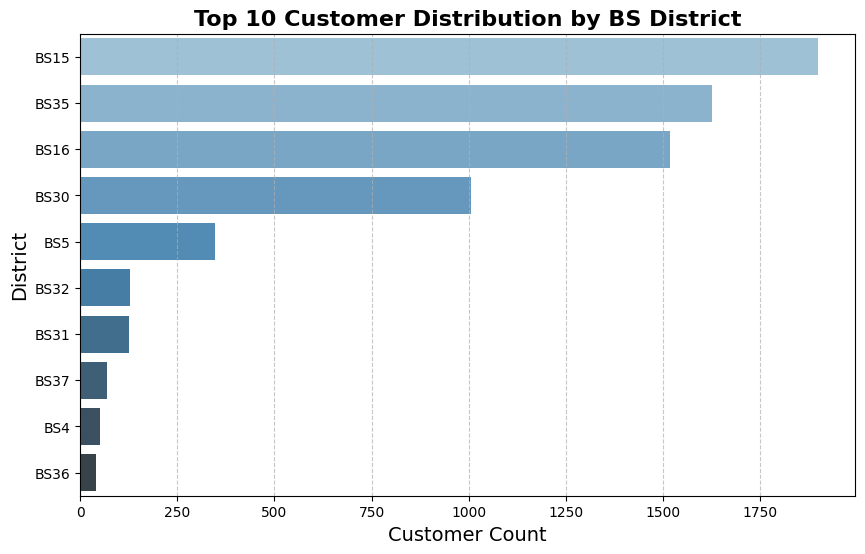

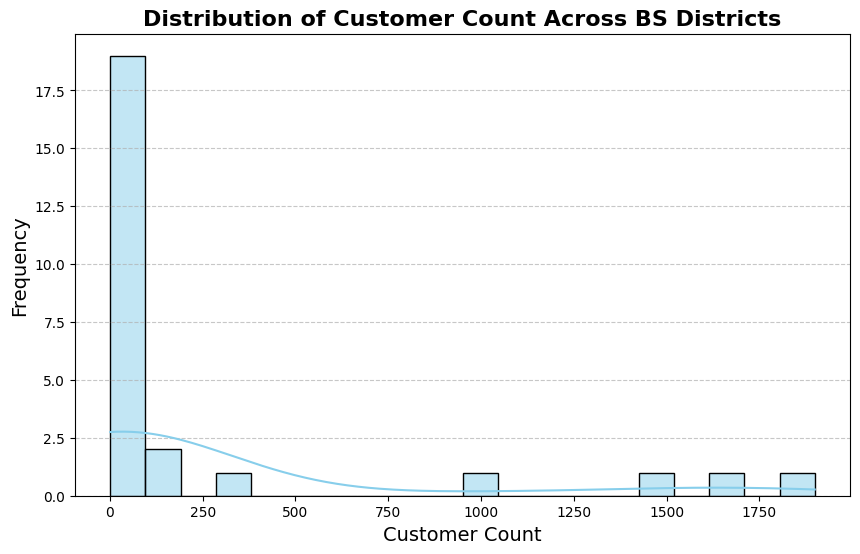

In [23]:
# Outlier Removal: Keeping only BS Districts
bs_districts = district_counts[district_counts["District"].str.startswith("BS")].copy()

# Recalculating the percentage after outlier removal
bs_districts["Percentage"] = (bs_districts["Count"] / bs_districts["Count"].sum()) * 100

# Sorting the data by Count for better visualization
bs_districts = bs_districts.sort_values("Count", ascending=False)

# Top 10 Districts for Better Visualization
top_10_districts = bs_districts.head(10)

# 1. Top 10 Customer Distribution - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="District", data=top_10_districts, palette="Blues_d", hue=None, legend=False)
plt.title("Top 10 Customer Distribution by BS District", fontsize=16, fontweight="bold")
plt.xlabel("Customer Count", fontsize=14)
plt.ylabel("District", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# 2. Distribution Plot (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(bs_districts["Count"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Customer Count Across BS Districts", fontsize=16, fontweight="bold")
plt.xlabel("Customer Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [24]:
# Filter the DataFrame to only include BS districts
bs_districts = district_counts[district_counts['District'].str.startswith("BS")].copy()

# Print the list of unique districts after outlier removal
print("\nUnique BS Districts After Outlier Removal:")
unique_districts = bs_districts["District"].unique()
for district in unique_districts:
    print(district)

# Print the total number of unique BS districts
print(f"\nTotal number of unique BS districts after outlier removal: {len(unique_districts)}")


Unique BS Districts After Outlier Removal:
BS15
BS35
BS16
BS30
BS5
BS32
BS31
BS37
BS4
BS36
BS34
BS14
BS10
BS39
BS7
BS1
BS9
BS3
BS11
BS13
BS2
BS20
BS21
BS8
BS6
BS17

Total number of unique BS districts after outlier removal: 26


In [25]:
# Group by "Count" and get the number of districts for each count
district_counts_summary = bs_districts["Count"].value_counts().sort_index()

# Print the results in a neat format
print("Number of Districts with X Members:")
for count, num_districts in district_counts_summary.items():
    print(f"Number of districts with {count} members: {num_districts}")

Number of Districts with X Members:
Number of districts with 1 members: 3
Number of districts with 2 members: 1
Number of districts with 4 members: 3
Number of districts with 5 members: 3
Number of districts with 6 members: 2
Number of districts with 8 members: 1
Number of districts with 9 members: 1
Number of districts with 27 members: 1
Number of districts with 30 members: 1
Number of districts with 40 members: 1
Number of districts with 51 members: 1
Number of districts with 70 members: 1
Number of districts with 125 members: 1
Number of districts with 128 members: 1
Number of districts with 347 members: 1
Number of districts with 1006 members: 1
Number of districts with 1517 members: 1
Number of districts with 1626 members: 1
Number of districts with 1899 members: 1


In [26]:
# Geospatial Analysis

# Step 1: Load the cleaned dataset (assuming df is already loaded)
# Outlier Removal: Keeping only BS Districts
df = df[df["Postcode"].str.startswith("BS")]

# Step 2: Group by the postcode and center to get membership counts
postcode_counts = df.groupby(['Postcode', 'Center']).size().reset_index(name='member_count')

# Step 3: Geocode Customer Postcodes using postcodes.io
def bulk_lookup(postcodes):
    url = "https://api.postcodes.io/postcodes"
    response = requests.post(url, json={"postcodes": postcodes})
    if response.status_code == 200:
        return response.json()["result"]
    else:
        print("Error:", response.status_code)
        return None

# Get the list of unique postcodes from our grouped data
unique_postcodes = postcode_counts['Postcode'].unique().tolist()
batch_size = 100
results = []
for i in range(0, len(unique_postcodes), batch_size):
    batch = unique_postcodes[i:i+batch_size]
    res = bulk_lookup(batch)
    if res is not None:
        results.extend(res)
    time.sleep(1)

geocoded_list = []
for item in results:
    query = item['query']
    result = item['result']
    if result is not None:
        lat = result['latitude']
        lon = result['longitude']
        geocoded_list.append({"Postcode": query, "latitude": lat, "longitude": lon})

geocoded_df = pd.DataFrame(geocoded_list)

# Merge the geocoded coordinates with our membership counts
merged = pd.merge(postcode_counts, geocoded_df, on='Postcode', how='inner')
print("Total geocoded unique full postcodes:", merged.shape[0])

# Step 4: Manually Set Correct Centre Locations
centre_coords = {
    "Longwell Green": {"lat": 51.4486, "lon": -2.5004},
    "Kingswood": {"lat": 51.4734, "lon": -2.5077},
    "Thornbury": {"lat": 51.6007, "lon": -2.5271}
}

# Step 5: Create an Interactive Map with Folium
map_center = [merged['latitude'].mean(), merged['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define pastel colors for the centers
center_colors = {
    "Longwell Green": "#A0D8B3",  # Pastel Green
    "Kingswood": "#FFDDC1",       # Light Peach
    "Thornbury": "#A8C5E0"        # Soft Blue
}

# Darker shades for members
member_colors = {
    "Longwell Green": "#006400",  # Dark Green
    "Kingswood": "#8B4513",       # Saddle Brown
    "Thornbury": "#00008B"        # Dark Blue
}

# Add the centres as stars with fixed labels
for centre_name, coord in centre_coords.items():
    folium.Marker(
        location=[coord["lat"], coord["lon"]],
        icon=folium.Icon(color='red', icon='star'),
        popup=f"<b>{centre_name}</b>",
    ).add_to(m)

    # Adding a label with a fixed position to avoid overlap
    folium.Marker(
        location=[coord["lat"] + 0.001, coord["lon"]],  # Slightly offset for visibility
        icon=folium.DivIcon(html=f"""<div style="font-size: 14px; font-weight: bold;">{centre_name}</div>""")
    ).add_to(m)

# Add members as pastel fill with dark outline
for _, row in merged.iterrows():
    center = row['Center']
    fill_color = center_colors.get(center, "gray")  # Pastel fill
    outline_color = member_colors.get(center, "black")  # Dark outline
    radius = 5 + row['member_count'] * 0.3  # Adjust radius based on member count
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=outline_color,
        weight=1.2,  # Reduced outline thickness
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        popup=f"Postcode: {row['Postcode']}<br>Center: {center}<br>Members: {row['member_count']}"
    ).add_to(m)

# Add a title to the map
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Customer Distribution Across BS Districts</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

# Save and display the interactive map
m.save("interactive_map_centers.html")
print("Map saved as interactive_map_centers.html")

Total geocoded unique full postcodes: 3416
Map saved as interactive_map_centers.html


#### Disabilities Analysis

In [27]:
# Extract and sort unique membership plans
unique_plans_cleaned = sorted(df["Plan"].dropna().astype(str).unique())

# Print each membership plan on a new line
print("Unique Membership Plans:\n")
for plan in unique_plans_cleaned:
    print(plan)

Unique Membership Plans:

12 Month Adult Concession
12 Month Adult Membership
12 Month Corporate Membership
12 Month EOP - NHS Referral Membership
12 Month Lifeshape - NHS Referral Membership
12 Month Lifestyle Adult Corporate Membership
12 Month Lifestyle Adult Couple Membership
12 Month Lifestyle Adult Membership
12 Month Lifestyle Adult Membership - Concession From April 2024
12 Month Lifestyle Bodytone Concession
12 Month Lifestyle Concession (Benefits/Health) Membership
12 Month Lifestyle Concession Membership
12 Month Lifestyle Corporate Membership
12 Month Lifestyle Junior (11-17Yrs) Membership
12 Month Lifestyle Junior Membership
12 Month Lifestyle Membership
12 Month Lifestyle Older Adult 66+ Membership
12 Month Lifestyle Older Adult Membership
12 Month Lifestyle On Referral Healthy Weight Management Membership
12 Month Lifestyle On Referral Membership
12 Month Lifestyle On Referral Membership Including Bodytone And Biocircuit
12 Month Lifestyle Student (18Yrs+) Membership
12 

In [28]:
# List of disability-related membership plans
disability_plans = [
    "12 Month EOP - NHS Referral Membership",
    "12 Month Lifeshape - NHS Referral Membership",
    "Total Flexible EOP",
    "12 Month Lifestyle On Referral Healthy Weight Management Membership",
    "12 Month Lifestyle On Referral Membership Including Bodytone And Biocircuit",
    "12 Month Lifestyle On Referral Membership",
    "Month To Month Total Flexible LOR Healthy Weight Membership",
    "Month To Month Lifestyle On Referral Membership",
    "Lifestyle Wellbeing Studio LOR",
    "12 Month Lifestyle Wellbeing Studio LOR",
    "Annual Wellbeing Studio LOR"
]

# Filter dataset to only include members with disability-related plans
df_disability = df[df["Plan"].isin(disability_plans)].copy()

# Get total number of members with disability-related plans
total_disability_members = len(df_disability)

# Breakdown by Active Lifestyle Center
disability_by_center = df_disability["Center"].value_counts()

# Breakdown by Gender
disability_by_gender = df_disability["Gender"].value_counts()

# Display results
print(f"Total Members with Disability-Related Plans: {total_disability_members}\n")
print("Members by Center:")
print(disability_by_center, "\n")
print("Members by Gender:")
print(disability_by_gender)

Total Members with Disability-Related Plans: 477

Members by Center:
Center
Kingswood         190
Longwell Green    170
Thornbury         117
Name: count, dtype: int64 

Members by Gender:
Gender
F    326
M    151
Name: count, dtype: int64


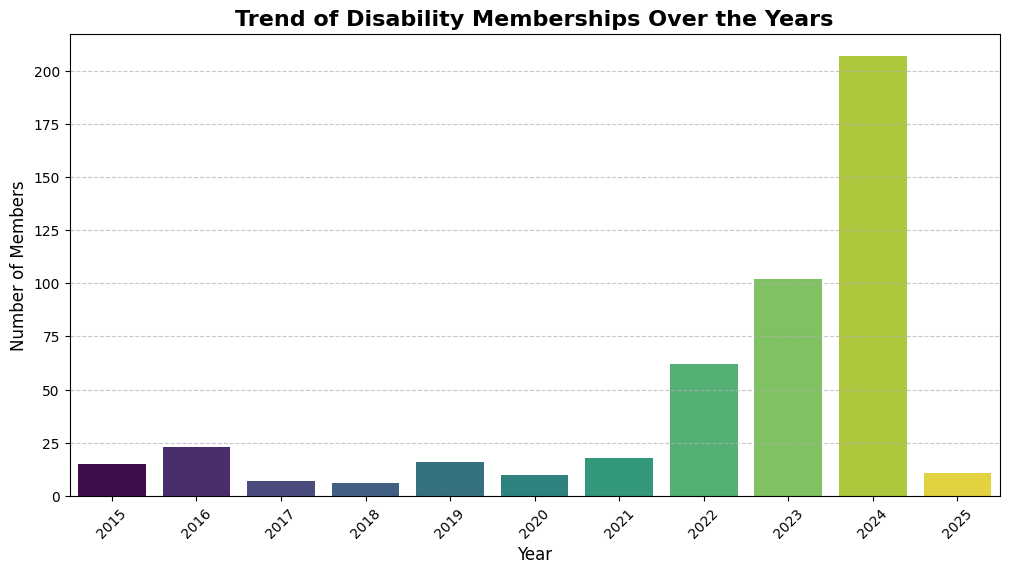

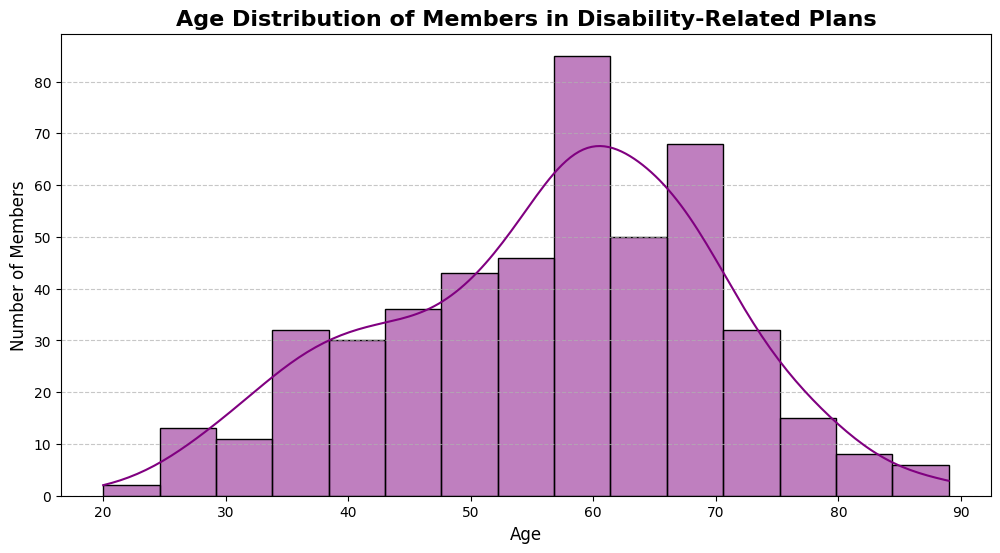

<ipython-input-29-b24c9d2d71dd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disability_by_center.index, y=disability_by_center.values, palette=center_colors, legend=False)


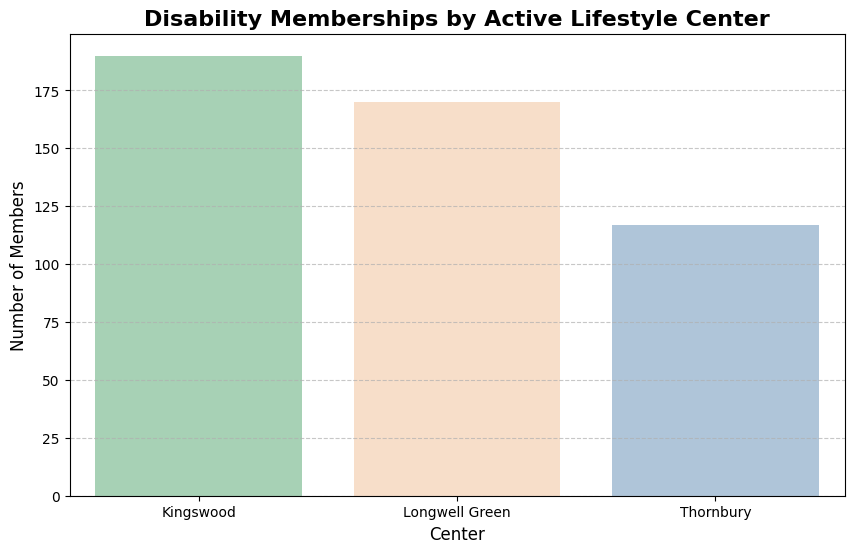

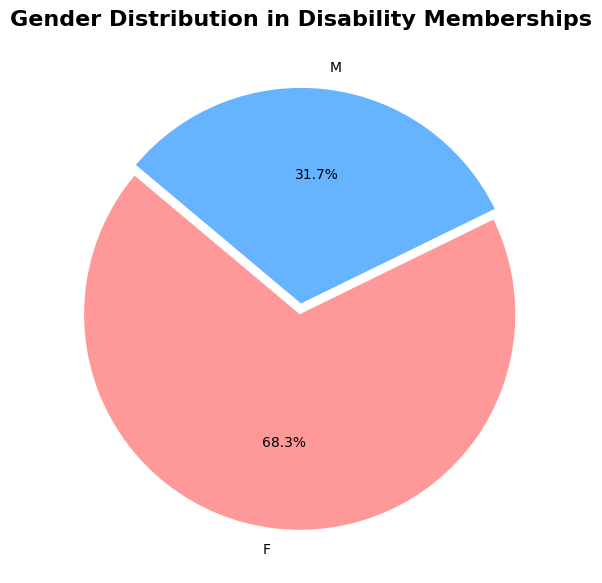

In [29]:
# Extract year for trend analysis
df_disability["Join Year"] = df_disability["Signing/Join Date"].dt.year

# 📅 **1. Trend Analysis Over Time (Yearly Membership Enrollment)**
plt.figure(figsize=(12, 6))
sns.countplot(data=df_disability, x="Join Year", hue="Join Year", palette="viridis", legend=False)
plt.title("Trend of Disability Memberships Over the Years", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 👵 **2. Age Distribution of Disability Members**
plt.figure(figsize=(12, 6))
sns.histplot(df_disability["Age"].dropna(), bins=15, kde=True, color="purple")
plt.title("Age Distribution of Members in Disability-Related Plans", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📊 **3. Disability Memberships by Center (Bar Chart)**
# Define pastel colors for the centers
center_colors = ["#A0D8B3", "#FFDDC1", "#A8C5E0"]  # Pastel Green, Light Peach, Soft Blue
plt.figure(figsize=(10, 6))
sns.barplot(x=disability_by_center.index, y=disability_by_center.values, palette=center_colors, legend=False)
plt.title("Disability Memberships by Active Lifestyle Center", fontsize=16, fontweight="bold")
plt.xlabel("Center", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🚻 **4. Gender Distribution in Disability Memberships (Pie Chart)**
plt.figure(figsize=(7, 7))
plt.pie(disability_by_gender, labels=disability_by_gender.index, autopct='%1.1f%%', colors=["#ff9999","#66b3ff"], startangle=140, explode=(0.05, 0))
plt.title("Gender Distribution in Disability Memberships", fontsize=16, fontweight="bold")
plt.show()


#### Employment Status Analysis

In [30]:
# Code to Filter & Analyze Employment-Related Memberships

# List of employment-related membership plans
employment_plans = [
    "12 Month Corporate Membership",
    "12 Month Corporate Lifestyle Membership",
    "12 Month Lifestyle Corporate Membership",
    "12 Month Total Lifestyle Corporate Membership",
    "Month To Month Total Flexible Corporate",
    "Total Flexible Corporate",
    "Month To Month Staff & Family Adult Membership",
    "Month To Month Staff & Family Membership Child",
    "Staff Family Member Adult"
]

# Filter dataset to only include members with employment-related plans
df_employment = df[df["Plan"].isin(employment_plans)].copy()

# Get total number of members in employment-related plans
total_employment_members = len(df_employment)

# Breakdown by Active Lifestyle Center
employment_by_center = df_employment["Center"].value_counts()

# Breakdown by Gender
employment_by_gender = df_employment["Gender"].value_counts()

# Display results
print(f"Total Members with Employment-Related Plans: {total_employment_members}\n")
print("Members by Center:")
print(employment_by_center, "\n")
print("Members by Gender:")
print(employment_by_gender)

Total Members with Employment-Related Plans: 1329

Members by Center:
Center
Longwell Green    524
Thornbury         409
Kingswood         396
Name: count, dtype: int64 

Members by Gender:
Gender
F    856
M    473
Name: count, dtype: int64


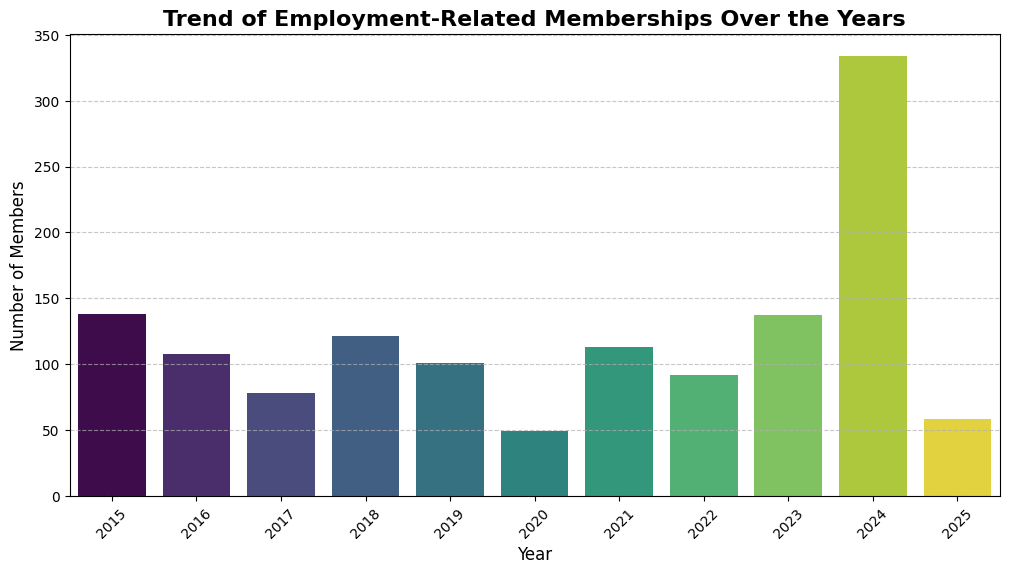

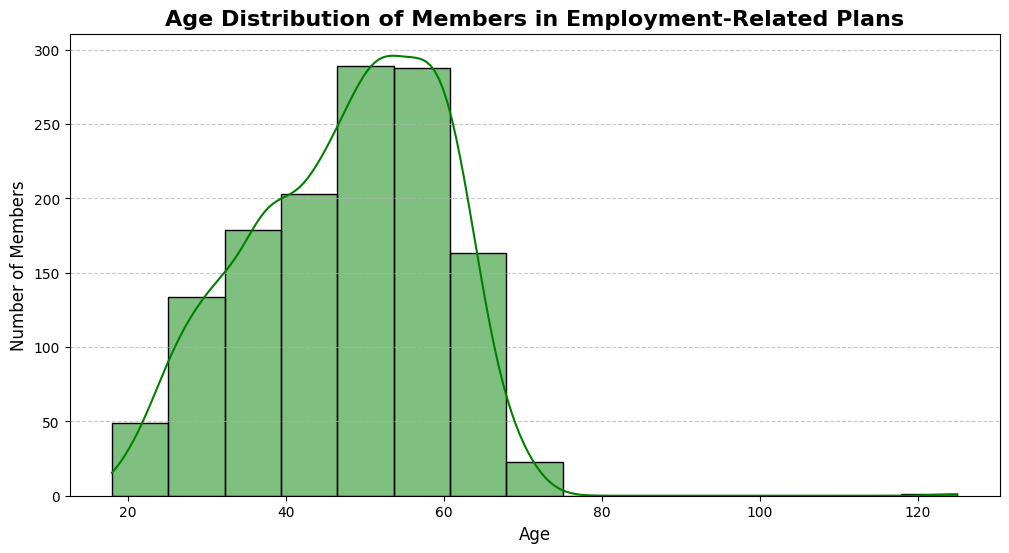

<ipython-input-31-4a31ca654400>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_by_center.index, y=employment_by_center.values, palette=center_colors, legend=False)


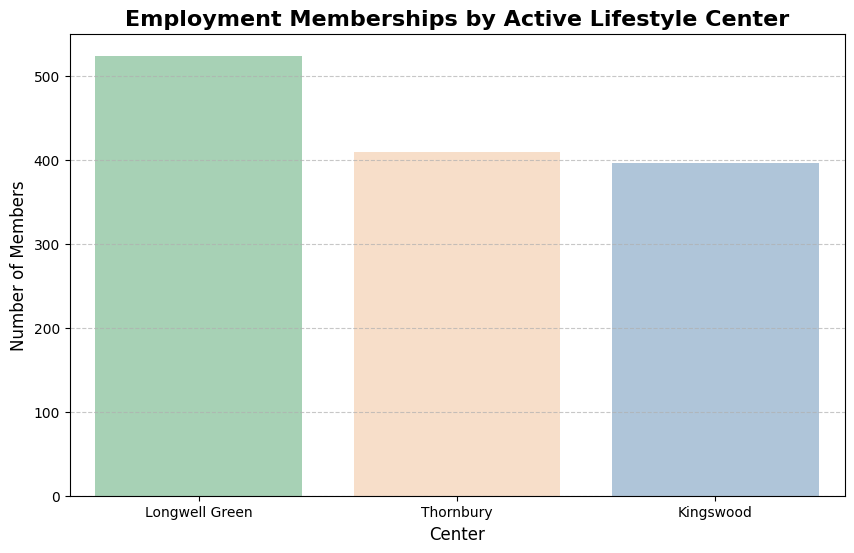

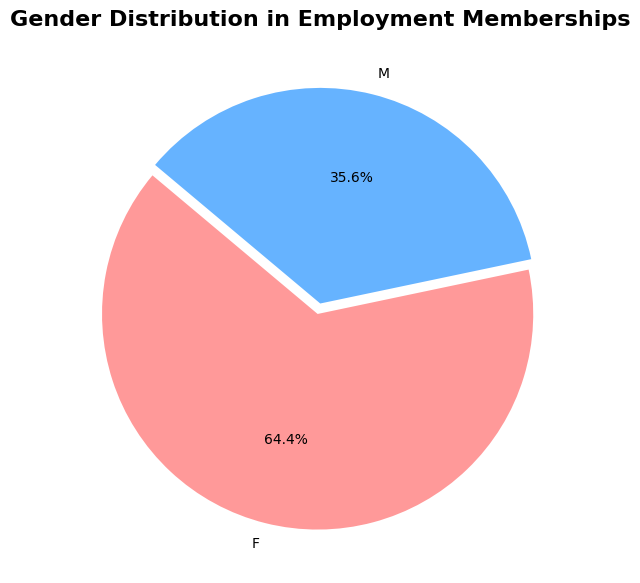

In [31]:
# Extract year for trend analysis
df_employment["Join Year"] = df_employment["Signing/Join Date"].dt.year

# 📅 **1. Trend Analysis Over Time (Yearly Membership Enrollment)**
plt.figure(figsize=(12, 6))
sns.countplot(data=df_employment, x="Join Year", hue="Join Year", palette="viridis", legend=False)
plt.title("Trend of Employment-Related Memberships Over the Years", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 👵 **2. Age Distribution of Employment Members**
plt.figure(figsize=(12, 6))
sns.histplot(df_employment["Age"].dropna(), bins=15, kde=True, color="green")
plt.title("Age Distribution of Members in Employment-Related Plans", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📊 **3. Employment Memberships by Center (Bar Chart)**
# Define pastel colors for the centers
center_colors = ["#A0D8B3", "#FFDDC1", "#A8C5E0"]  # Pastel Green, Light Peach, Soft Blue
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_by_center.index, y=employment_by_center.values, palette=center_colors, legend=False)
plt.title("Employment Memberships by Active Lifestyle Center", fontsize=16, fontweight="bold")
plt.xlabel("Center", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🚻 **4. Gender Distribution in Employment Memberships (Pie Chart)**
plt.figure(figsize=(7, 7))
plt.pie(employment_by_gender, labels=employment_by_gender.index, autopct='%1.1f%%', colors=["#ff9999","#66b3ff"], startangle=140, explode=(0.05, 0))
plt.title("Gender Distribution in Employment Memberships", fontsize=16, fontweight="bold")
plt.show()

### OBJECTIVE 2: Membership Retention and Loyalty Analysis by Pratik Nandeshwar

<ipython-input-35-d2998ed47c5c>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  members_per_bin = df.groupby(['Membership_Type', 'duration_bin']).size().reset_index(name='member_count')


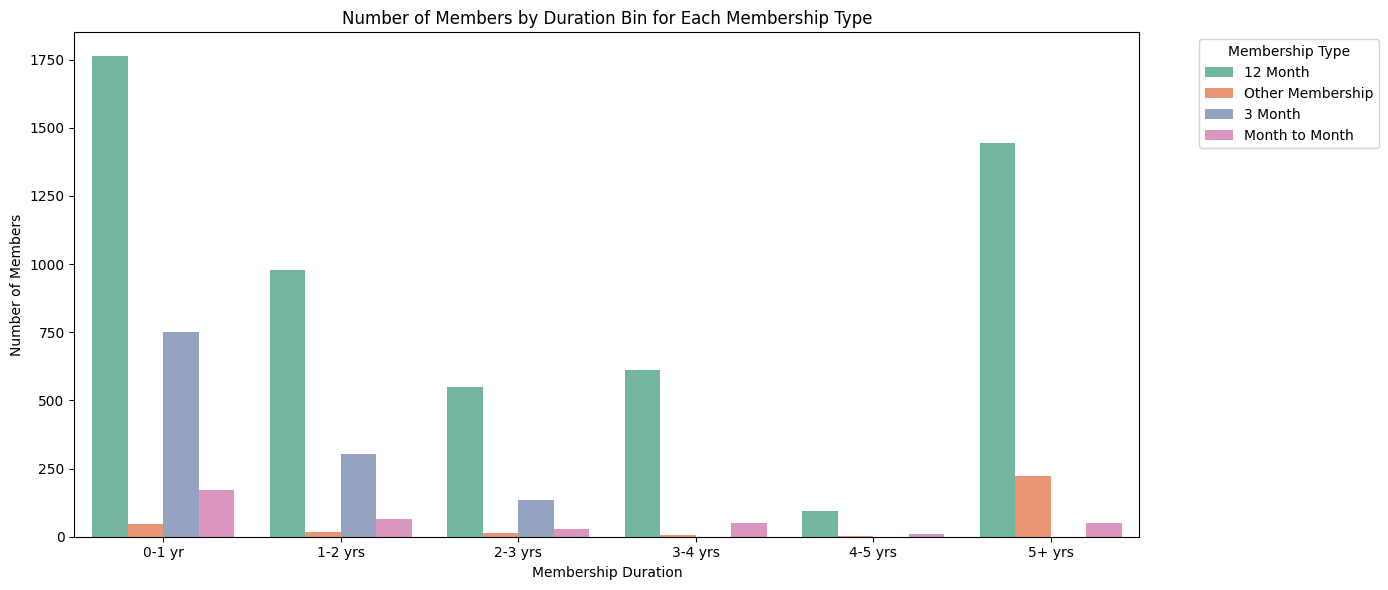

<ipython-input-35-d2998ed47c5c>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='duration_bin', order=labels, palette='Blues')


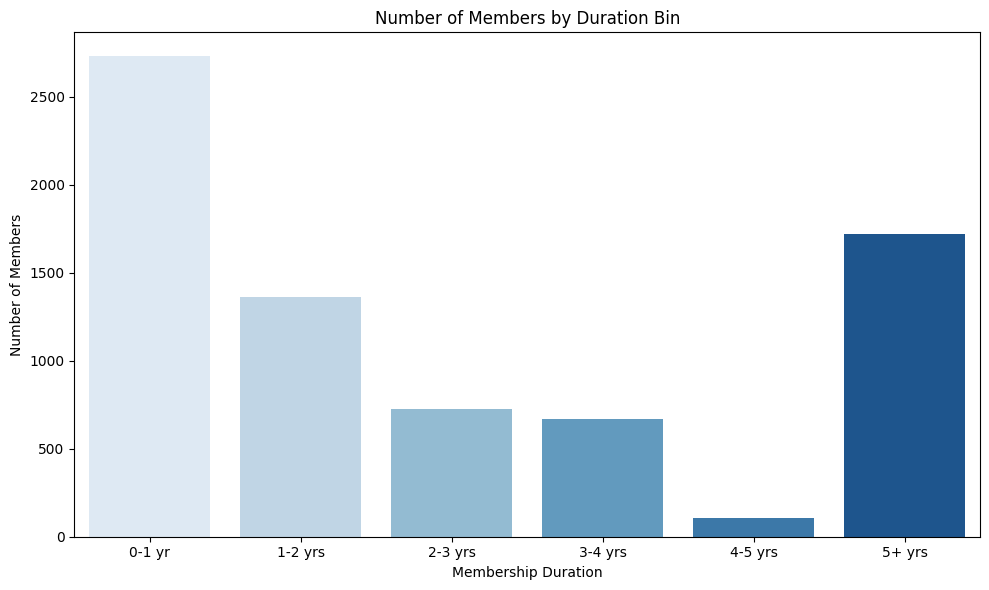

<ipython-input-35-d2998ed47c5c>:70: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Membership_Type', columns='duration_bin', aggfunc='size', fill_value=0)


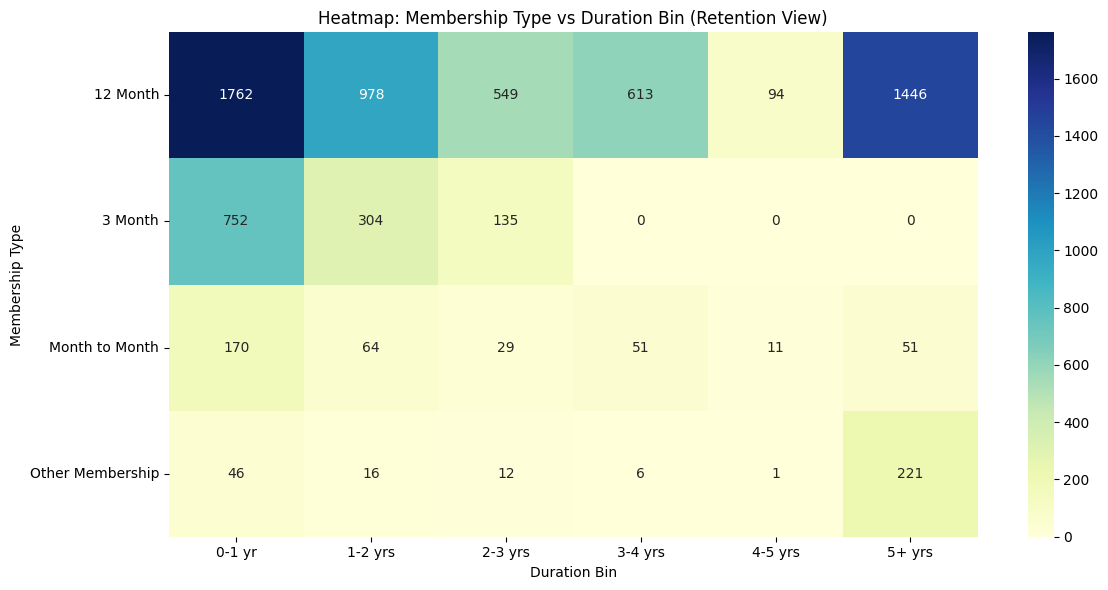

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (Preprocessed Data after EDA)
file_path = r"/content/Circadian_Trust_Cleaned_Data.xlsx"
df = pd.read_excel(file_path, engine='openpyxl') # Use openpyxl engine to handle encoding

# Clean and preprocess

df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')
df = df.dropna(subset=['Signing/Join Date', 'Membership_Type'])

df['current_date'] = pd.Timestamp.today()
df['duration_years'] = (df['current_date'] - df['Signing/Join Date']).dt.days / 365.25

# Ensure age is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Create duration bins

bins = [0, 1, 2, 3, 4, 5, 10]
labels = ['0-1 yr', '1-2 yrs', '2-3 yrs', '3-4 yrs', '4-5 yrs', '5+ yrs']
df['duration_bin'] = pd.cut(df['duration_years'], bins=bins, labels=labels, right=False)

# Order the duration bins
duration_order = ['0-1 yr', '1-2 yrs', '2-3 yrs', '3-4 yrs', '4-5 yrs', '5+ yrs']


# Aggregations


# Members per membership type per duration bin
members_per_bin = df.groupby(['Membership_Type', 'duration_bin']).size().reset_index(name='member_count')

# Average duration per membership type
duration_stats = df.groupby('Membership_Type')['duration_years'].agg(['mean', 'std', 'min', 'max']).reset_index()
duration_stats['range'] = duration_stats['max'] - duration_stats['min']


# Bar Chart – Members per Duration Bin

#Plot: Members by Duration Bin for each Membership Type

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='duration_bin', hue='Membership_Type', order=duration_order, palette='Set2')
plt.title("Number of Members by Duration Bin for Each Membership Type")
plt.xlabel("Membership Duration")
plt.ylabel("Number of Members")
plt.legend(title='Membership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Bar Chart – Members per Duration Bin
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='duration_bin', order=labels, palette='Blues')
plt.title("Number of Members by Duration Bin")
plt.xlabel("Membership Duration")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.show()


# Step 7: Heatmap – Membership Type vs Duration Bin

heatmap_data = df.pivot_table(index='Membership_Type', columns='duration_bin', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Membership Type vs Duration Bin (Retention View)")
plt.xlabel("Duration Bin")
plt.ylabel("Membership Type")
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')
df = df.dropna(subset=['Signing/Join Date'])

df['current_date'] = pd.Timestamp.today()
df['duration_years'] = (df['current_date'] - df['Signing/Join Date']).dt.days / 365.25


#  Melt membership columns into subtypes

membership_columns = ['12 Month', '3 Month', 'Month to Month', 'Other Membership']

# Melt those columns
df_melted = df.melt(
    id_vars=['duration_years'],
    value_vars=membership_columns,
    var_name='main_type',
    value_name='subtype'
)

# Drop empty subtype entries
df_melted = df_melted.dropna(subset=['subtype'])


#  Get top 3 subtypes by duration for each main type

top_subtypes = (
    df_melted.groupby(['main_type', 'subtype'])['duration_years']
    .mean()
    .reset_index()
    .sort_values(['main_type', 'duration_years'], ascending=[True, False])
    .groupby('main_type')
    .head(3)
)


#  Plot top 3 for each main membership category

sns.set(style="whitegrid", font_scale=1.2)

def plot_top(df_sub, title):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_sub, x='subtype', y='duration_years', palette='crest')
    plt.title(f"Top 3 Subtypes by Average Duration ({title})", fontsize=16)
    plt.ylabel("Avg Duration (Years)", fontsize=14)
    plt.xlabel("Membership Subtype", fontsize=14)
    plt.xticks(rotation=25, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    # Add labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<ipython-input-37-d94d46f5528e>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_age = df.groupby('age_group')['duration_years'].mean().reset_index()
<ipython-input-37-d94d46f5528e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_age, x='age_group', y='duration_years', palette='coolwarm')
<ipython-input-37-d94d46f5528e>:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


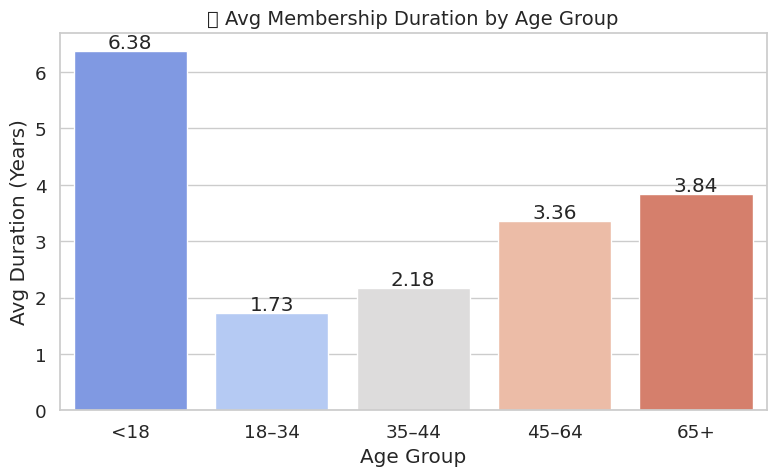

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')
df = df.dropna(subset=['Signing/Join Date', 'Age'])

# Ensure numeric Age
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])


#  Calculate duration

df['current_date'] = pd.Timestamp.today()
df['duration_years'] = (df['current_date'] - df['Signing/Join Date']).dt.days / 365.25


#Create age groups

bins = [0, 17, 34, 44, 64, 120]
labels = ['<18', '18–34', '35–44', '45–64', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


# Group and visualize

avg_by_age = df.groupby('age_group')['duration_years'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_by_age, x='age_group', y='duration_years', palette='coolwarm')

plt.title("📊 Avg Membership Duration by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Avg Duration (Years)")

# Annotate values
for i, row in avg_by_age.iterrows():
    plt.text(i, row['duration_years'] + 0.05, f"{row['duration_years']:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


#  Preprocess data

df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')
df = df.dropna(subset=['Signing/Join Date'])

df['current_date'] = pd.Timestamp.today()
df['duration_years'] = (df['current_date'] - df['Signing/Join Date']).dt.days / 365.25

# Melt membership columns
membership_columns = ['12 Month', '3 Month', 'Month to Month', 'Other Membership']
df_melted = df.melt(
    id_vars=['duration_years'],
    value_vars=membership_columns,
    var_name='main_type',
    value_name='subtype'
).dropna(subset=['subtype'])

#  summary stats

subtype_stats = (
    df_melted.groupby('subtype')['duration_years']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Avg Duration (Years)', 'count': 'Membership Count'})
)

# Define quadrants

x_median = subtype_stats['Avg Duration (Years)'].median()
y_median = subtype_stats['Membership Count'].median()

def assign_quadrant(row):
    if row['Avg Duration (Years)'] >= x_median and row['Membership Count'] >= y_median:
        return '🟦 Popular & Loyal'
    elif row['Avg Duration (Years)'] < x_median and row['Membership Count'] >= y_median:
        return '🟥 Popular but Low Loyalty'
    elif row['Avg Duration (Years)'] >= x_median and row['Membership Count'] < y_median:
        return '🟨 Loyal but Niche'
    else:
        return '🟩 Low Use & Low Loyalty'

subtype_stats['Quadrant'] = subtype_stats.apply(assign_quadrant, axis=1)

#  Plot with Plotly

fig = px.scatter(
    subtype_stats,
    x='Avg Duration (Years)',
    y='Membership Count',
    color='Quadrant',
    hover_name='subtype',  # Show subtype only on hover
    title="📊 Membership Quadrant Chart: Loyalty vs Popularity",
    size_max=40
)

# Add quadrant threshold lines
fig.add_vline(x=x_median, line_dash="dash", line_color="gray", annotation_text="Median Duration", annotation_position="top right")
fig.add_hline(y=y_median, line_dash="dash", line_color="gray", annotation_text="Median Count", annotation_position="bottom left")

# Remove on-plot text
fig.update_traces(text=None)

# Layout adjustments
fig.update_layout(
    xaxis_title="Average Duration (Years)",
    yaxis_title="Membership Count",
    legend_title="Quadrant",
    hovermode="closest"
)

#  Show & Export

fig.show()

# Export to standalone HTML file
fig.write_html("Membership_Quadrant_Chart.html")

#  Google Colab
try:
    from google.colab import files
    files.download("Membership_Quadrant_Chart.html")
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Preprocess data
df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')
df = df.dropna(subset=['Signing/Join Date'])

df['current_date'] = df['Signing/Join Date'].max()
df['duration_years'] = (df['current_date'] - df['Signing/Join Date']).dt.days / 365.25

# Melt membership columns
membership_columns = ['12 Month', '3 Month', 'Month to Month', 'Other Membership']
df_melted = df.melt(
    id_vars=['duration_years'],
    value_vars=membership_columns,
    var_name='main_type',
    value_name='subtype'
).dropna(subset=['subtype'])

# Summary statistics
subtype_stats = (
    df_melted.groupby('subtype')['duration_years']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Avg Duration (Years)', 'count': 'Membership Count'})
)

# Define quadrant thresholds
x_median = subtype_stats['Avg Duration (Years)'].median()
y_median = subtype_stats['Membership Count'].median()

def assign_quadrant(row):
    if row['Avg Duration (Years)'] >= x_median and row['Membership Count'] >= y_median:
        return '🟦 Popular & Loyal'
    elif row['Avg Duration (Years)'] < x_median and row['Membership Count'] >= y_median:
        return '🟥 Popular but Low Loyalty'
    elif row['Avg Duration (Years)'] >= x_median and row['Membership Count'] < y_median:
        return '🟨 Loyal but Niche'
    else:
        return '🟩 Low Use & Low Loyalty'

subtype_stats['Quadrant'] = subtype_stats.apply(assign_quadrant, axis=1)

# Create Plot
fig = px.scatter(
    subtype_stats,
    x='Avg Duration (Years)',
    y='Membership Count',
    color='Quadrant',
    hover_name='subtype',
    size='Membership Count',
    size_max=60,
    title="📊 Membership Quadrant Chart: Loyalty vs Popularity"
)

# Add quadrant threshold lines
fig.add_vline(x=x_median, line_dash="dash", line_color="gray", annotation_text="Median Duration", annotation_position="top right")
fig.add_hline(y=y_median, line_dash="dash", line_color="gray", annotation_text="Median Count", annotation_position="bottom left")

# Layout improvements
fig.update_layout(
    xaxis_title="Average Membership Duration (Years)",
    yaxis_title="Total Membership Count",
    legend_title="Segment",
    template="plotly_white",
    hovermode="closest",
    font=dict(family="Arial", size=14),
)

# Enable zoom and pan
fig.update_layout(dragmode='zoom', hoverlabel=dict(bgcolor="white", font_size=12))

# Show and export
fig.show()
fig.write_html("Enhanced_Membership_Quadrant_Chart.html")


### OBJECTIVE 3: Cross Centre Membership Analysis by Litheshitha Gona

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Assuming df is your original DataFrame with the issue of "None" values
# First, let's properly process the data

def process_membership_data(df):
    """
    Process the membership data and fix the None values issue
    """
    # Make a copy to avoid modifying the original
    processed_df = df.copy()

    # Clean plan strings
    def clean_plan(plan):
        if isinstance(plan, str):
            return plan.strip()
        return plan

    processed_df['Plan'] = processed_df['Plan'].apply(clean_plan)

    # Create a consistent Membership_Type column
    processed_df['Membership_Type'] = 'Other'  # Default

    # Apply pattern matching for each type
    mask_12_month = processed_df['Plan'].str.contains(r'^12\s*Month', case=False, na=False)
    processed_df.loc[mask_12_month, 'Membership_Type'] = '12 Month'

    mask_3_month = processed_df['Plan'].str.contains(r'^3\s*Month', case=False, na=False)
    processed_df.loc[mask_3_month, 'Membership_Type'] = '3 Month'

    mask_month_to_month = processed_df['Plan'].str.contains(r'^Month\s*to\s*Month', case=False, na=False)
    processed_df.loc[mask_month_to_month, 'Membership_Type'] = 'Month to Month'

    # Extract membership sub-type (Adult, Concession, etc.)
    def extract_subtype(plan):
        if not isinstance(plan, str):
            return 'Unknown'

        # Check for common subtypes
        subtypes = ['Adult', 'Concession', 'Student', 'Junior', 'Child', 'Corporate',
                   'Couple', 'Family', 'Older Adult', 'Staff', 'Referral', 'Lifestyle']

        for subtype in subtypes:
            if subtype.lower() in plan.lower():
                return subtype

        return 'Standard'

    processed_df['Membership_Subtype'] = processed_df['Plan'].apply(extract_subtype)

    # Map site codes to full names
    site_mapping = {
        'TH': 'Thornbury',
        'LG': 'Longwell Green',
        'KW': 'Kingswood'
    }
    processed_df['Center'] = processed_df['Site'].map(site_mapping)

    # Convert Signing/Join Date to datetime if it exists
    if 'Signing/Join Date' in processed_df.columns:
        processed_df['Signing/Join Date'] = pd.to_datetime(
            processed_df['Signing/Join Date'],
            format='%d-%m-%Y',
            errors='coerce'
        )

        # Add joining month and year columns
        processed_df['Join_Month'] = processed_df['Signing/Join Date'].dt.month
        processed_df['Join_Year'] = processed_df['Signing/Join Date'].dt.year
        processed_df['Join_MonthYear'] = processed_df['Signing/Join Date'].dt.strftime('%Y-%m')

    return processed_df





In [41]:
# Process the data
df_processed = process_membership_data(df)

# Now perform analysis across centers

def analyze_memberships_by_center(df):
    """
    Analyze membership types and lengths across centers
    """
    print("=" * 50)
    print("MEMBERSHIP ANALYSIS ACROSS CENTERS")
    print("=" * 50)

    # 1. Overall membership distribution by center
    center_counts = df['Center'].value_counts()
    print("\n1. Overall Membership Count by Center:")
    print(center_counts)

    # 2. Membership type distribution by center
    print("\n2. Membership Type Distribution by Center:")
    type_by_center = pd.crosstab(df['Center'], df['Membership_Type'])
    print(type_by_center)

    # Calculate percentages
    type_by_center_pct = pd.crosstab(df['Center'], df['Membership_Type'], normalize='index') * 100
    print("\nPercentage Distribution:")
    print(type_by_center_pct.round(1))

    # 3. Membership subtype distribution by center
    print("\n3. Top Membership Subtypes by Center:")
    for center in df['Center'].unique():
        print(f"\n{center}:")
        print(df[df['Center'] == center]['Membership_Subtype'].value_counts().head(5))

    # 4. Age distribution by center and membership type
    print("\n4. Average Age by Center and Membership Type:")
    age_analysis = df.groupby(['Center', 'Membership_Type'])['Age'].agg(['mean', 'min', 'max', 'count'])
    print(age_analysis.round(1))

    # 5. Gender distribution by center
    print("\n5. Gender Distribution by Center:")
    gender_by_center = pd.crosstab(df['Center'], df['Gender'])
    print(gender_by_center)

    # Calculate gender percentages
    gender_by_center_pct = pd.crosstab(df['Center'], df['Gender'], normalize='index') * 100
    print("\nGender Percentage Distribution:")
    print(gender_by_center_pct.round(1))

    # 6. Recent signup trends if date information is available
    if 'Join_MonthYear' in df.columns:
        print("\n6. Recent Signup Trends (Last 6 Months):")
        recent_signups = df.sort_values('Signing/Join Date', ascending=False)
        recent_signups = recent_signups.head(100)  # Adjust as needed
        monthly_signups = pd.crosstab(recent_signups['Join_MonthYear'], recent_signups['Center'])
        print(monthly_signups.tail(6))  # Show last 6 months

    return {
        'center_counts': center_counts,
        'type_by_center': type_by_center,
        'type_by_center_pct': type_by_center_pct,
        'age_analysis': age_analysis,
        'gender_by_center': gender_by_center
    }

MEMBERSHIP ANALYSIS ACROSS CENTERS

1. Overall Membership Count by Center:
Center
Longwell Green    2763
Kingswood         2345
Thornbury         2203
Name: count, dtype: int64

2. Membership Type Distribution by Center:
Membership_Type  12 Month  3 Month  Month to Month  Other
Center                                                   
Kingswood            1733      398             128     86
Longwell Green       2101      451             127     84
Thornbury            1608      342             121    132

Percentage Distribution:
Membership_Type  12 Month  3 Month  Month to Month  Other
Center                                                   
Kingswood            73.9     17.0             5.5    3.7
Longwell Green       76.0     16.3             4.6    3.0
Thornbury            73.0     15.5             5.5    6.0

3. Top Membership Subtypes by Center:

Longwell Green:
Membership_Subtype
Adult         1425
Corporate      487
Concession     366
Referral       179
Junior         135
Nam

<ipython-input-42-d4bcaec81a18>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Visualizations saved to current directory

Full analysis exported to 'membership_analysis_complete.xlsx'

ADVANCED ANALYSIS

1. Top Postcode Areas by Center:

Longwell Green - Top 5 Postcode Areas:
Postcode_Area
BS15    1003
BS30     920
BS16     368
BS5      190
BS31     117
Name: count, dtype: int64

Kingswood - Top 5 Postcode Areas:
Postcode_Area
BS16    1133
BS15     889
BS5      149
BS30      80
BS37      13
Name: count, dtype: int64

Thornbury - Top 5 Postcode Areas:
Postcode_Area
BS35    1620
GL12     174
BS32     119
GL13     104
BS37      41
Name: count, dtype: int64

2. Membership Type by Age Group:
Membership_Type  12 Month  3 Month  Month to Month  Other
Age_Group                                                
Under 18               16       10               6      1
18-24                 286      130              31      5
25-34                 887      311              64     12
35-49                1735      411             136     44
50-64                1603      254 

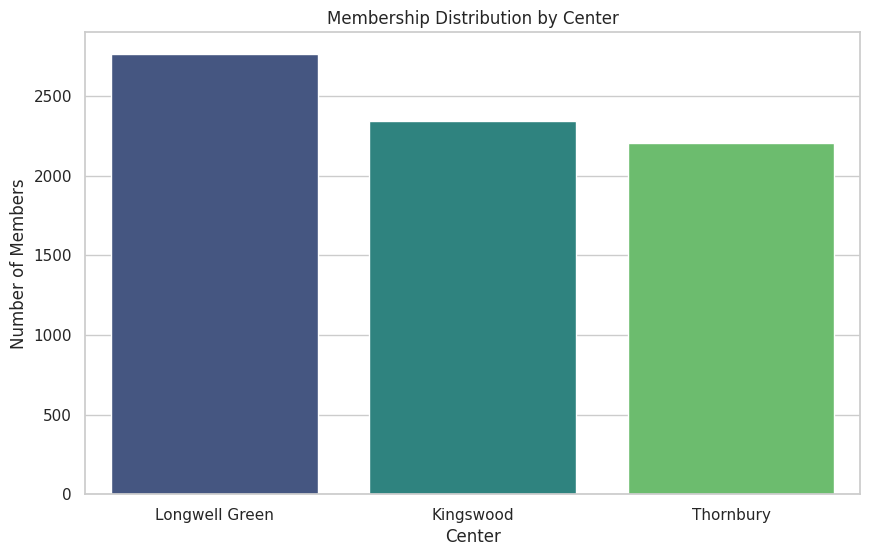

<Figure size 1200x800 with 0 Axes>

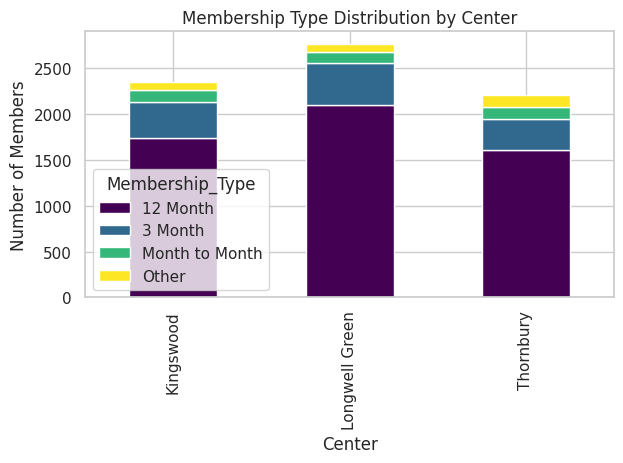

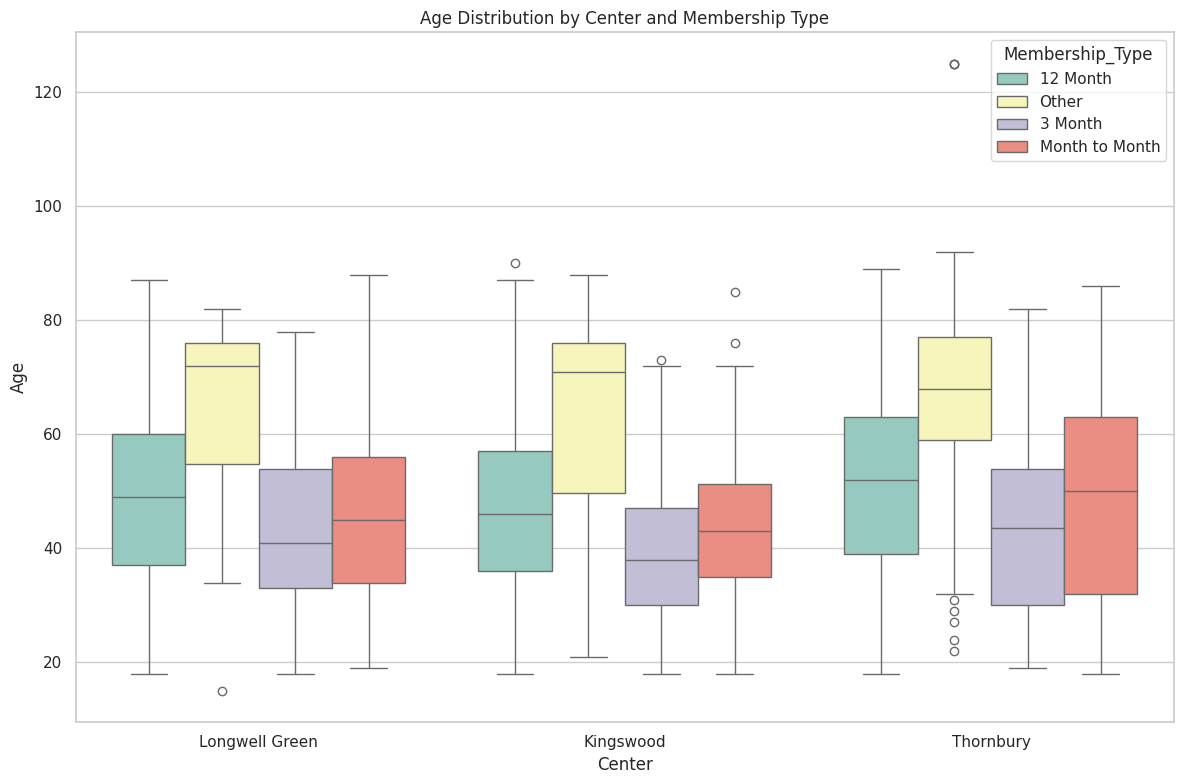

<Figure size 1000x600 with 0 Axes>

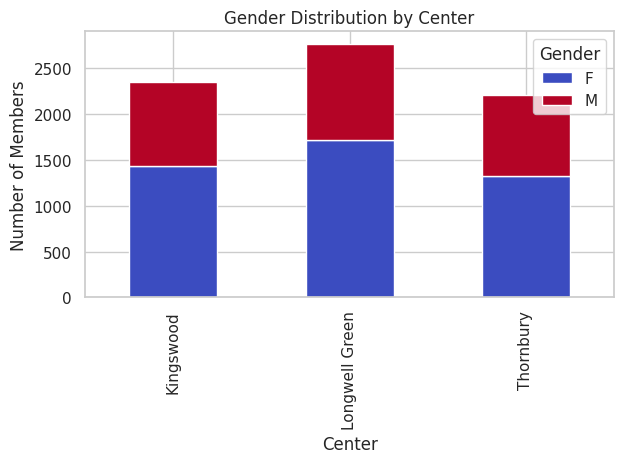

<Figure size 1400x800 with 0 Axes>

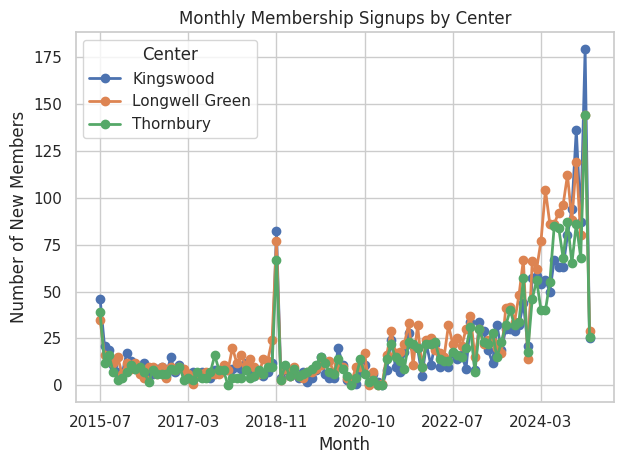

In [42]:
# Generate visualizations for better insights
def create_visualizations(df, analysis_results):
    """
    Create visualizations to better understand the data
    """
    # Set style
    sns.set(style="whitegrid")

    # 1. Membership Distribution by Center
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Center', data=df, palette='viridis')
    plt.title('Membership Distribution by Center')
    plt.ylabel('Number of Members')
    plt.savefig('center_distribution.png')

    # 2. Membership Type Distribution by Center
    plt.figure(figsize=(12, 8))
    membership_pivot = df.pivot_table(index='Center', columns='Membership_Type',
                                      aggfunc='size', fill_value=0)
    membership_pivot.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Membership Type Distribution by Center')
    plt.ylabel('Number of Members')
    plt.tight_layout()
    plt.savefig('membership_type_by_center.png')

    # 3. Age Distribution by Center
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Center', y='Age', hue='Membership_Type', data=df, palette='Set3')
    plt.title('Age Distribution by Center and Membership Type')
    plt.tight_layout()
    plt.savefig('age_distribution.png')

    # 4. Gender Distribution by Center
    plt.figure(figsize=(10, 6))
    gender_pivot = df.pivot_table(index='Center', columns='Gender',
                                 aggfunc='size', fill_value=0)
    gender_pivot.plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title('Gender Distribution by Center')
    plt.ylabel('Number of Members')
    plt.tight_layout()
    plt.savefig('gender_distribution.png')

    # 5. Monthly Signup Trends if date is available
    if 'Join_MonthYear' in df.columns:
        plt.figure(figsize=(14, 8))
        time_series = df.groupby(['Join_MonthYear', 'Center']).size().unstack(fill_value=0)
        # Sort by date
        time_series = time_series.reindex(sorted(time_series.index))
        time_series.plot(kind='line', marker='o', linewidth=2)
        plt.title('Monthly Membership Signups by Center')
        plt.ylabel('Number of New Members')
        plt.xlabel('Month')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('monthly_signups.png')

    print("Visualizations saved to current directory")

# Run the analysis
analysis_results = analyze_memberships_by_center(df_processed)

# Create visualizations
create_visualizations(df_processed, analysis_results)

# Export the processed data for further use
df_processed.to_excel('membership_analysis_complete.xlsx', index=False)
print("\nFull analysis exported to 'membership_analysis_complete.xlsx'")

# Additional advanced analysis - retention by center and membership type
def advanced_analysis(df):
    """
    Perform more advanced analysis that might help the project
    """
    print("\n" + "=" * 50)
    print("ADVANCED ANALYSIS")
    print("=" * 50)

    # 1. Membership density by postcode (first 3 characters)
    if 'Postcode' in df.columns:
        df['Postcode_Area'] = df['Postcode'].astype(str).str[:4]
        print("\n1. Top Postcode Areas by Center:")
        for center in df['Center'].unique():
            print(f"\n{center} - Top 5 Postcode Areas:")
            postcode_counts = df[df['Center'] == center]['Postcode_Area'].value_counts().head(5)
            print(postcode_counts)

    # 2. Age group analysis
    df['Age_Group'] = pd.cut(df['Age'],
                            bins=[0, 18, 25, 35, 50, 65, 100],
                            labels=['Under 18', '18-24', '25-34', '35-49', '50-64', '65+'])

    print("\n2. Membership Type by Age Group:")
    age_type_analysis = pd.crosstab(df['Age_Group'], df['Membership_Type'])
    print(age_type_analysis)

    # 3. Membership type preference by gender
    print("\n3. Membership Type Preference by Gender:")
    gender_preference = pd.crosstab(df['Gender'], df['Membership_Type'], normalize='index') * 100
    print(gender_preference.round(1))

    # 4. Center comparison metrics
    print("\n4. Center Comparison Key Metrics:")

    # Average age
    avg_age = df.groupby('Center')['Age'].mean().round(1)

    # % of long-term memberships (12 Month)
    long_term_pct = df.groupby('Center')['Membership_Type'].apply(
        lambda x: (x == '12 Month').mean() * 100).round(1)

    # % of short-term memberships (Month to Month)
    short_term_pct = df.groupby('Center')['Membership_Type'].apply(
        lambda x: (x == 'Month to Month').mean() * 100).round(1)

    # Gender ratio (F:M)
    gender_ratio = df.groupby('Center')['Gender'].apply(
        lambda x: (x == 'F').sum() / (x == 'M').sum()).round(2)

    comparison_df = pd.DataFrame({
        'Avg Age': avg_age,
        '% 12 Month': long_term_pct,
        '% Month to Month': short_term_pct,
        'F:M Ratio': gender_ratio
    })

    print(comparison_df)

    return comparison_df

# Run advanced analysis
comparison_metrics = advanced_analysis(df_processed)

# Export the comparison metrics
comparison_metrics.to_excel('center_comparison_metrics.xlsx')
print("\nCenter comparison metrics exported to 'center_comparison_metrics.xlsx'")

print("\nAnalysis complete. All results have been saved to Excel files and visualizations.")

In [45]:
er4 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

def analyze_memberships_by_center(df):
    """
    Analyze membership types and lengths across centers with enhanced details
    """
    print("=" * 50)
    print("COMPREHENSIVE MEMBERSHIP ANALYSIS ACROSS CENTERS")
    print("=" * 50)

    # 1. Overall membership distribution by center (descending order)
    center_counts = df['Center'].value_counts()
    print("\n1. Overall Membership Count by Center (Descending Order):")
    print(center_counts)

    # 2. Membership type distribution by center
    print("\n2. Membership Type Distribution by Center:")
    type_by_center = pd.crosstab(df['Center'], df['Membership_Type'])
    print(type_by_center)

    # Calculate percentages
    type_by_center_pct = pd.crosstab(df['Center'], df['Membership_Type'], normalize='index') * 100
    print("\nPercentage Distribution:")
    print(type_by_center_pct.round(1))

    # 3. Membership subtype distribution by center
    print("\n3. Top Membership Subtypes by Center:")
    for center in df['Center'].unique():
        print(f"\n{center}:")
        print(df[df['Center'] == center]['Membership_Subtype'].value_counts().head(5))

    # 4. Age distribution by center and membership type
    print("\n4. Age Distribution by Center and Membership Type:")
    age_analysis = df.groupby(['Center', 'Membership_Type'])['Age'].agg(['mean', 'min', 'max', 'count'])
    print(age_analysis.round(1))

    # 5. Gender distribution by center
    print("\n5. Gender Distribution by Center:")
    gender_by_center = pd.crosstab(df['Center'], df['Gender'])
    print(gender_by_center)

    # Calculate gender percentages
    gender_by_center_pct = pd.crosstab(df['Center'], df['Gender'], normalize='index') * 100
    print("\nGender Percentage Distribution:")
    print(gender_by_center_pct.round(1))

    # 6. Recent signup trends with more detailed analysis
    if 'Join_MonthYear' in df.columns:
        print("\n6. Recent Signup Trends:")
        recent_signups = df.sort_values('Signing/Join Date', ascending=False)
        monthly_signups = pd.crosstab(recent_signups['Join_MonthYear'], recent_signups['Center'])
        print(monthly_signups)

    return {
        'center_counts': center_counts,
        'type_by_center': type_by_center,
        'type_by_center_pct': type_by_center_pct,
        'age_analysis': age_analysis,
        'gender_by_center': gender_by_center,
        'monthly_signups': monthly_signups
    }

def create_comprehensive_visualizations(df, analysis_results):
    """
    Create comprehensive visualizations to provide deeper insights
    """
    # Use matplotlib default color cycle
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

    # Create a figure with multiple subplots
    plt.figure(figsize=(20, 25))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # 1. Membership Distribution by Center (Pie Chart)
    plt.subplot(3, 2, 1)
    df['Center'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Membership Distribution by Center', fontsize=12)
    plt.ylabel('')

    # 2. Membership Type Distribution (Stacked Bar)
    plt.subplot(3, 2, 2)
    membership_pivot = df.pivot_table(index='Center', columns='Membership_Type',
                                      aggfunc='size', fill_value=0)
    membership_pivot.plot(kind='bar', stacked=True)
    plt.title('Membership Type Distribution by Center', fontsize=12)
    plt.xlabel('Center')
    plt.ylabel('Number of Members')
    plt.legend(title='Membership Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 3. Age Distribution Boxplot
    plt.subplot(3, 2, 3)
    plt.boxplot([df[df['Center'] == center]['Age'] for center in df['Center'].unique()],
                labels=df['Center'].unique())
    plt.title('Age Distribution by Center', fontsize=12)
    plt.xlabel('Center')
    plt.ylabel('Age')

    # 4. Gender Distribution
    plt.subplot(3, 2, 4)
    gender_pivot = df.pivot_table(index='Center', columns='Gender',
                                  aggfunc='size', fill_value=0)
    gender_pivot.plot(kind='bar', stacked=True, color=['pink', 'lightblue'])
    plt.title('Gender Distribution by Center', fontsize=12)
    plt.xlabel('Center')
    plt.ylabel('Number of Members')
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 5. Membership Subtype Breakdown
    plt.subplot(3, 2, 5)
    subtype_pivot = df.pivot_table(index='Center', columns='Membership_Subtype',
                                   aggfunc='size', fill_value=0)
    subtype_pivot.plot(kind='bar', stacked=True)
    plt.title('Membership Subtype Distribution', fontsize=12)
    plt.xlabel('Center')
    plt.ylabel('Number of Members')
    plt.legend(title='Membership Subtype', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 6. Monthly Signup Trends (Line Plot)
    plt.subplot(3, 2, 6)
    if 'Join_MonthYear' in df.columns:
        time_series = df.groupby(['Join_MonthYear', 'Center']).size().unstack(fill_value=0)
        time_series = time_series.reindex(sorted(time_series.index))
        time_series.plot(kind='line', marker='o', linewidth=2)
        plt.title('Monthly Membership Signups by Center', fontsize=12)
        plt.xlabel('Month')
        plt.ylabel('Number of New Members')
        plt.grid(True)
        plt.xticks(rotation=45)

    # Save the comprehensive visualization
    plt.tight_layout()
    plt.savefig('comprehensive_membership_analysis.png', dpi=300, bbox_inches='tight')
    print("Comprehensive visualization saved as 'comprehensive_membership_analysis.png'")

    # Additional detailed visualizations

    # Heatmap of Membership Types
    plt.figure(figsize=(12, 8))
    type_by_center_pct = pd.crosstab(df['Center'], df['Membership_Type'], normalize='index') * 100
    plt.imshow(type_by_center_pct, cmap='YlGnBu', aspect='auto')
    plt.colorbar(label='Percentage')
    plt.title('Membership Type Percentage Heatmap by Center')
    plt.xlabel('Membership Type')
    plt.ylabel('Center')
    plt.xticks(range(len(type_by_center_pct.columns)), type_by_center_pct.columns, rotation=45)
    plt.yticks(range(len(type_by_center_pct.index)), type_by_center_pct.index)

    # Add percentage annotations
    for i in range(len(type_by_center_pct.index)):
        for j in range(len(type_by_center_pct.columns)):
            plt.text(j, i, f'{type_by_center_pct.iloc[i, j]:.1f}%',
                     ha='center', va='center', color='black')

    plt.tight_layout()
    plt.savefig('membership_type_heatmap.png', dpi=300)

    # Distribution of Membership Subtypes
    plt.figure(figsize=(15, 8))
    subtype_by_center = df.groupby(['Center', 'Membership_Subtype']).size().unstack(fill_value=0)
    plt.imshow(subtype_by_center, cmap='rocket_r', aspect='auto')
    plt.colorbar(label='Number of Members')
    plt.title('Membership Subtype Distribution by Center')
    plt.xlabel('Membership Subtype')
    plt.ylabel('Center')
    plt.xticks(range(len(subtype_by_center.columns)), subtype_by_center.columns, rotation=45)
    plt.yticks(range(len(subtype_by_center.index)), subtype_by_center.index)

    # Add count annotations
    for i in range(len(subtype_by_center.index)):
        for j in range(len(subtype_by_center.columns)):
            plt.text(j, i, str(subtype_by_center.iloc[i, j]),
                     ha='center', va='center', color='white')

    plt.tight_layout()
    plt.savefig('membership_subtype_distribution.png', dpi=300)

    print("Additional visualizations saved.")

# Process the data
df_processed = process_membership_data(df)

# Run the analysis
analysis_results = analyze_memberships_by_center(df_processed)

# Create comprehensive visualizations
create_comprehensive_visualizations(df_processed, analysis_results)

# Export the processed data and results
df_processed.to_excel('membership_analysis_complete.xlsx', index=False)
print("\nFull analysis exported to 'membership_analysis_complete.xlsx'")

SyntaxError: invalid syntax (<ipython-input-45-136d91d46e52>, line 1)

### OBJECTIVE 4: Geospatial and Service Utilization Analysis by Abhiraj Nag

In [46]:
# Geospatial Analysis

# Step 1: Load the cleaned dataset (assuming df is already loaded)
# Outlier Removal: Keeping only BS Districts
df = df[df["Postcode"].str.startswith("BS")]

# Step 2: Group by the postcode and center to get membership counts
postcode_counts = df.groupby(['Postcode', 'Center']).size().reset_index(name='member_count')

# Step 3: Geocode Customer Postcodes using postcodes.io
def bulk_lookup(postcodes):
    url = "https://api.postcodes.io/postcodes"
    response = requests.post(url, json={"postcodes": postcodes})
    if response.status_code == 200:
        return response.json()["result"]
    else:
        print("Error:", response.status_code)
        return None

# Get the list of unique postcodes from our grouped data
unique_postcodes = postcode_counts['Postcode'].unique().tolist()
batch_size = 100
results = []
for i in range(0, len(unique_postcodes), batch_size):
    batch = unique_postcodes[i:i+batch_size]
    res = bulk_lookup(batch)
    if res is not None:
        results.extend(res)
    time.sleep(1)

geocoded_list = []
for item in results:
    query = item['query']
    result = item['result']
    if result is not None:
        lat = result['latitude']
        lon = result['longitude']
        geocoded_list.append({"Postcode": query, "latitude": lat, "longitude": lon})

geocoded_df = pd.DataFrame(geocoded_list)

# Merge the geocoded coordinates with our membership counts
merged = pd.merge(postcode_counts, geocoded_df, on='Postcode', how='inner')
print("Total geocoded unique full postcodes:", merged.shape[0])

# Step 4: Manually Set Correct Centre Locations
centre_coords = {
    "Longwell Green": {"lat": 51.4486, "lon": -2.5004},
    "Kingswood": {"lat": 51.4734, "lon": -2.5077},
    "Thornbury": {"lat": 51.6007, "lon": -2.5271}
}

# Step 5: Create an Interactive Map with Folium
map_center = [merged['latitude'].mean(), merged['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define pastel colors for the centers
center_colors = {
    "Longwell Green": "#A0D8B3",  # Pastel Green
    "Kingswood": "#FFDDC1",       # Light Peach
    "Thornbury": "#A8C5E0"        # Soft Blue
}

# Darker shades for members
member_colors = {
    "Longwell Green": "#006400",  # Dark Green
    "Kingswood": "#8B4513",       # Saddle Brown
    "Thornbury": "#00008B"        # Dark Blue
}

# Add the centres as stars with fixed labels
for centre_name, coord in centre_coords.items():
    folium.Marker(
        location=[coord["lat"], coord["lon"]],
        icon=folium.Icon(color='red', icon='star'),
        popup=f"<b>{centre_name}</b>",
    ).add_to(m)

    # Adding a label with a fixed position to avoid overlap
    folium.Marker(
        location=[coord["lat"] + 0.001, coord["lon"]],  # Slightly offset for visibility
        icon=folium.DivIcon(html=f"""<div style="font-size: 14px; font-weight: bold;">{centre_name}</div>""")
    ).add_to(m)

# Add members as pastel fill with dark outline
for _, row in merged.iterrows():
    center = row['Center']
    fill_color = center_colors.get(center, "gray")  # Pastel fill
    outline_color = member_colors.get(center, "black")  # Dark outline
    radius = 5 + row['member_count'] * 0.3  # Adjust radius based on member count
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=outline_color,
        weight=1.2,  # Reduced outline thickness
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        popup=f"Postcode: {row['Postcode']}<br>Center: {center}<br>Members: {row['member_count']}"
    ).add_to(m)

# Add a title to the map
title_html = '''
    <h3 align="center" style="font-size:20px"><b>Customer Distribution Across BS Districts</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

# Save and display the interactive map
m.save("interactive_map_centers.html")
print("Map saved as interactive_map_centers.html")

Total geocoded unique full postcodes: 3416
Map saved as interactive_map_centers.html


In [50]:
# Step 1: Load and clean your data
df = pd.read_excel("/content/Circadian_Trust_Cleaned_Data.xlsx")

# Clean the postcode column: remove extra whitespace and convert to uppercase.
df['Postcode'] = df['Postcode'].str.strip().str.upper()

# Define a function to fix full UK postcode formatting:
def fix_postcode_full(pc):
    pc = pc.strip().upper()
    # If no space exists and the postcode is long enough, insert a space before the last 3 characters.
    if " " not in pc and len(pc) >= 5:
        return pc[:-3] + " " + pc[-3:]
    return pc

# Apply the function to create a fixed full postcode column.
df['postcode_fixed'] = df['Postcode'].apply(fix_postcode_full)

# Step 2: Group by the fixed full postcode to get membership counts
postcode_counts = df.groupby('postcode_fixed').size().reset_index(name='member_count')

# Step 3: Use postcodes.io for full postcode geocoding
def bulk_lookup(postcodes):
    url = "https://api.postcodes.io/postcodes"
    response = requests.post(url, json={"postcodes": postcodes})
    if response.status_code == 200:
        return response.json()["result"]
    else:
        print("Error: ", response.status_code)
        return None

# Prepare batches (e.g. 100 postcodes per batch)
unique_postcodes = postcode_counts['postcode_fixed'].tolist()
batch_size = 100
results = []
for i in range(0, len(unique_postcodes), batch_size):
    batch = unique_postcodes[i:i+batch_size]
    res = bulk_lookup(batch)
    if res is not None:
        results.extend(res)
    time.sleep(1)  # slight delay to be polite

# Process the lookup results.
geocoded_list = []
for item in results:
    query = item['query']
    result = item['result']
    if result is not None:  # Only add if lookup succeeded
        lat = result['latitude']
        lon = result['longitude']
        geocoded_list.append({"postcode": query, "latitude": lat, "longitude": lon})

geocoded_df = pd.DataFrame(geocoded_list)

# Merge the geocoded data with membership counts.
merged = pd.merge(postcode_counts, geocoded_df, left_on='postcode_fixed', right_on='postcode', how='inner')
print("Total geocoded unique full postcodes:", merged.shape[0])

# Step 4: Create an interactive Folium map with MarkerCluster
# Center the map at the mean location of your geocoded points.
map_center = [merged['latitude'].mean(), merged['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=8)

# Create a MarkerCluster to group nearby markers.
marker_cluster = MarkerCluster(name="Postcode Markers").add_to(m)

# Add each geocoded postcode as a CircleMarker to the MarkerCluster.
for _, row in merged.iterrows():
    # Adjust the multiplier (here, *0.5) as needed for a proper marker radius.
    radius = 5 + row['member_count'] * 0.5
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"Postcode: {row['postcode_fixed']}<br>Members: {row['member_count']}"
    ).add_to(marker_cluster)

# Optionally add a layer control to toggle marker clusters.
folium.LayerControl().add_to(m)

# Step 5: Compute summary statistics

# Calculate basic statistics.
total_geocoded_postcodes = merged.shape[0]
total_membership = merged['member_count'].sum()
avg_membership = merged['member_count'].mean()
median_membership = merged['member_count'].median()
std_membership = merged['member_count'].std()

# Identify top 10 postcode areas by membership.
top10 = merged.sort_values(by='member_count', ascending=False).head(10)
top10_str = top10[['postcode_fixed', 'member_count']].to_string(index=False)

print(total_geocoded_postcodes)
print(total_membership)
print(avg_membership)
print(median_membership)
print(std_membership)
print(top10)
print(top10_str)



# Clean the 'Postcode' column: remove extra whitespace and convert to uppercase.
df['Postcode'] = df['Postcode'].str.strip().str.upper()

# Function to fix full UK postcode formatting (inserts a space if missing)
def fix_postcode_full(pc):
    pc = pc.strip().upper()
    if " " not in pc and len(pc) >= 5:
        return pc[:-3] + " " + pc[-3:]
    return pc

# Create a new column with fixed postcodes.
df['postcode_fixed'] = df['Postcode'].apply(fix_postcode_full)

# Step 2: Group by Postcode and Center to Get Membership Counts
# This grouping aggregates membership counts per postcode for each centre.
postcode_counts = df.groupby(['postcode_fixed', 'Center']).size().reset_index(name='member_count')

# Step 3: Geocode Customer Postcodes using postcodes.io
def bulk_lookup(postcodes):
    url = "https://api.postcodes.io/postcodes"
    response = requests.post(url, json={"postcodes": postcodes})
    if response.status_code == 200:
        return response.json()["result"]
    else:
        print("Error:", response.status_code)
        return None

# Get the list of unique postcodes from our grouped data.
unique_postcodes = postcode_counts['postcode_fixed'].unique().tolist()
batch_size = 100
results = []
for i in range(0, len(unique_postcodes), batch_size):
    batch = unique_postcodes[i:i+batch_size]
    res = bulk_lookup(batch)
    if res is not None:
        results.extend(res)
    time.sleep(1)

geocoded_list = []
for item in results:
    query = item['query']
    result = item['result']
    if result is not None:
        lat = result['latitude']
        lon = result['longitude']
        geocoded_list.append({"postcode": query, "latitude": lat, "longitude": lon})

geocoded_df = pd.DataFrame(geocoded_list)

# Merge the geocoded coordinates with our membership counts.
merged = pd.merge(postcode_counts, geocoded_df, left_on='postcode_fixed', right_on='postcode', how='inner')
print("Total geocoded unique full postcodes:", merged.shape[0])

# Step 4: Create an Interactive Map with Folium

# Set the map center as the mean location of all geocoded customer points.
map_center = [merged['latitude'].mean(), merged['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define a dictionary mapping centre names to marker colors.
center_colors = {
    "Thornbury": "blue",
    "Longwell Green": "red",
    "Kingswood": "green"
}

# Create a MarkerCluster for customer markers.
marker_cluster = MarkerCluster(name="Customer Markers").add_to(m)

# Add each geocoded customer postcode as a CircleMarker,
# using the color associated with its centre.
for _, row in merged.iterrows():
    center = row['Center']
    color = center_colors.get(center, "gray")  # default to gray if the centre is not in the dictionary
    radius = 5 + row['member_count'] * 0.5  # adjust radius based on member count
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Postcode: {row['postcode_fixed']}<br>Center: {center}<br>Members: {row['member_count']}"
    ).add_to(marker_cluster)

# Mark the Three Centres on the Map
# Hard-coded approximate coordinates for the three centres.
centers = {
    "Thornbury": {"lat": 51.5842, "lon": -2.4336, "color": center_colors["Thornbury"]},
    "Longwell Green": {"lat": 51.4572, "lon": -2.5132, "color": center_colors["Longwell Green"]},
    "Kingswood": {"lat": 51.4414, "lon": -2.4651, "color": center_colors["Kingswood"]}
}

for center_name, info in centers.items():
    folium.Marker(
        location=[info["lat"], info["lon"]],
        icon=folium.Icon(color=info["color"], icon="info-sign"),
        popup=f"Center: {center_name}"
    ).add_to(m)

# Optionally add a layer control to toggle markers.
folium.LayerControl().add_to(m)

# Save and display the interactive map.
m.save("interactive_map_centers.html")
m


Total geocoded unique full postcodes: 3243
3243
7272
2.242368177613321
2.0
1.84162396923083
     postcode_fixed  member_count  postcode   latitude  longitude
2196       BS35 1AJ            20  BS35 1AJ  51.621545  -2.522531
2193       BS35 1AD            18  BS35 1AD  51.618238  -2.509768
2200       BS35 1AQ            18  BS35 1AQ  51.618679  -2.525994
2118       BS32 4EZ            15  BS32 4EZ  51.556427  -2.561466
2513       BS35 2YN            15  BS35 2YN  51.606628  -2.508165
2368       BS35 1UH            14  BS35 1UH  51.613150  -2.509133
2228       BS35 1DS            13  BS35 1DS  51.612693  -2.515020
2278       BS35 1JF            13  BS35 1JF  51.616876  -2.518592
2370       BS35 1UL            12  BS35 1UL  51.611349  -2.509849
468        BS15 4LS            12  BS15 4LS  51.462020  -2.479553
postcode_fixed  member_count
      BS35 1AJ            20
      BS35 1AD            18
      BS35 1AQ            18
      BS32 4EZ            15
      BS35 2YN            15
      BS

### OBJECTIVE 5: Programme Impact and Initiative Evaluation by Ran Cui

In [51]:
# Data Cleaning

# Cleaning column names: remove leading/trailing whitespace
df.columns = df.columns.str.strip()

# For all string columns, removing any extra whitespace
str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    df[col] = df[col].str.strip()

# Converting 'Signing/Join Date' to datetime format
df['Signing/Join Date'] = pd.to_datetime(df['Signing/Join Date'], errors='coerce')

# Check for missing values and print summary
print("Missing values per column:")
print(df.isnull().sum())

# Dropping rows with missing join dates
df = df.dropna(subset=['Signing/Join Date'])

# Ensure that 'Age' values are numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


Missing values per column:
Site                    0
Gender                  0
Postcode                0
Plan                    3
Age                     0
Signing/Join Date       0
Center                  0
Original_Postcode       0
Original_Plan           3
Membership_Type         0
12 Month             1869
3 Month              6120
Month to Month       6935
Other Membership     7012
postcode_fixed          0
dtype: int64


In [52]:
# Data Pre-processing & Feature Engineering

# Creating new columns for further analysis: JoinYear and JoinMonth
df['JoinYear'] = df['Signing/Join Date'].dt.year
df['JoinMonth'] = df['Signing/Join Date'].dt.month

# Creating a column for join date in string format if needed for plotting
df['JoinDate_str'] = df['Signing/Join Date'].dt.strftime('%Y-%m')

In [53]:
# Ensure 'Plan' column is treated as string
df['Plan'] = df['Plan'].astype(str)

In [54]:
# Extract different membership types
weight_memberships = df[df['Plan'].str.contains('weight', case=False, na=False)]
wellbeing_memberships = df[df['Plan'].str.contains('wellbeing', case=False, na=False)]
lor_referral_memberships = df[
    df['Plan'].str.contains('LOR|referral', case=False, na=False) &
    ~df['Plan'].str.contains('weight', case=False, na=False)
]

In [55]:
print(weight_memberships)

     Site Gender  Postcode                                               Plan  \
1091   LG      F  BS30 7AB  12 Month Lifestyle On Referral Healthy Weight ...   
1097   LG      F  BS30 5XY  12 Month Lifestyle On Referral Healthy Weight ...   
1452   LG      F  BS15 3SN  12 Month Lifestyle On Referral Healthy Weight ...   
2962   KW      F  BS15 1XJ  12 Month Lifestyle On Referral Healthy Weight ...   
2973   KW      F  BS15 3QE  12 Month Lifestyle On Referral Healthy Weight ...   
2975   KW      F  BS16 7JZ  12 Month Lifestyle On Referral Healthy Weight ...   
3071   KW      M  BS16 4QL  12 Month Lifestyle On Referral Healthy Weight ...   
3084   KW      F  BS15 4LU  12 Month Lifestyle On Referral Healthy Weight ...   
3128   KW      M  BS30 5HY  12 Month Lifestyle On Referral Healthy Weight ...   
3145   KW      M  BS15 3DT  12 Month Lifestyle On Referral Healthy Weight ...   
3148   KW      F  BS30 9XQ  12 Month Lifestyle On Referral Healthy Weight ...   
3220   KW      F  BS30 5DT  

In [56]:
print(wellbeing_memberships)

     Site Gender  Postcode                                               Plan  \
3860   TH      F  BS35 3TA                     Lifestyle Wellbeing Studio LOR   
3918   TH      F  BS35 2DP   Lifestyle Wellbeing Studio Concession Membership   
3960   TH      F  BS35 1FJ                            Annual Wellbeing Studio   
4084   TH      F  BS35 3TE   Lifestyle Wellbeing Studio Concession Membership   
4089   TH      F  BS35 1UQ                     Lifestyle Wellbeing Studio LOR   
...   ...    ...       ...                                                ...   
6097   TH      M  GL12 8HZ  Month To Month Total Flexible Wellbeing Studio...   
6100   TH      F  GL12 8HZ  Month To Month Total Flexible Wellbeing Studio...   
6178   TH      F  BS35 1PH  Month To Month Total Flexible Wellbeing Studio...   
6184   TH      F  BS34 8AX  Month To Month Total Flexible Wellbeing Studio...   
6200   TH      F  GL12 8UR  Month To Month Total Flexible Wellbeing Studio...   

      Age Signing/Join Date

In [57]:
print(lor_referral_memberships)

     Site Gender  Postcode                                             Plan  \
0      LG      F  BS16 6HQ        12 Month Lifestyle On Referral Membership   
9      LG      M  BS30 9BG        12 Month Lifestyle On Referral Membership   
52     LG      M  BS15 3EY        12 Month Lifestyle On Referral Membership   
56     LG      F  BS15 9ZE     12 Month Lifeshape - NHS Referral Membership   
59     LG      M  BS30 8QA           12 Month EOP - NHS Referral Membership   
...   ...    ...       ...                                              ...   
6522   KW      F  BS16 5RP  Month To Month Lifestyle On Referral Membership   
6574   KW      M   BS5 7NF        12 Month Lifestyle On Referral Membership   
6909   LG      M  BS15 8EU        12 Month Lifestyle On Referral Membership   
7052   LG      F  BS30 8EP        12 Month Lifestyle On Referral Membership   
7089   LG      M  BS15 8FG        12 Month Lifestyle On Referral Membership   

      Age Signing/Join Date          Center Origina

**Weight**

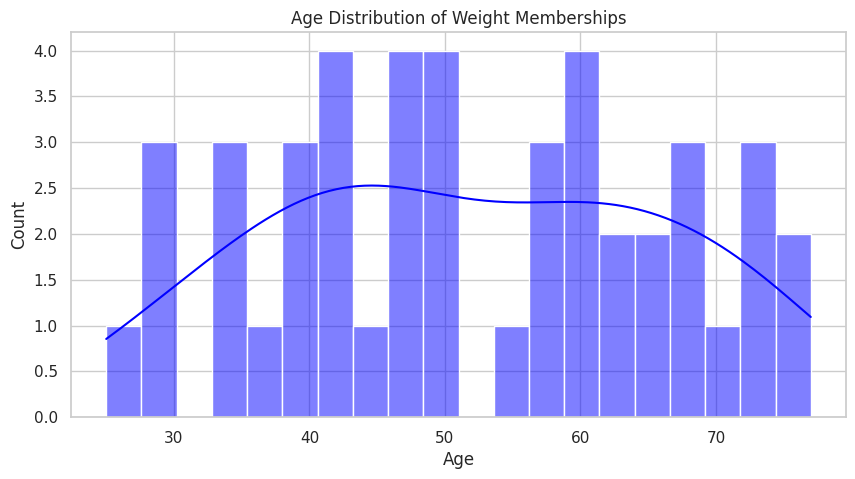

In [58]:
# 1. Age Distribution

plt.figure(figsize=(10, 5))
ax = sns.histplot(weight_memberships['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Weight Memberships")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

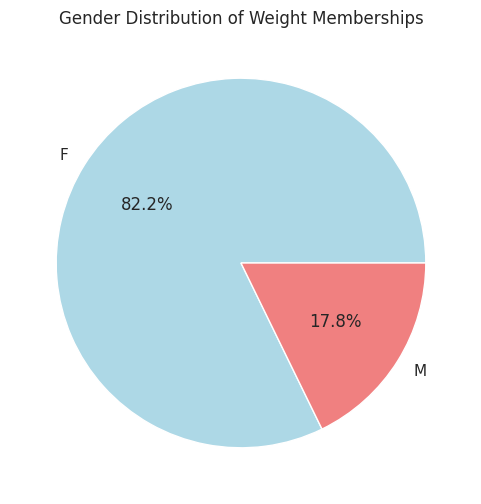

In [59]:
# 2. Gender Ratio

gender_counts = weight_memberships['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.title("Gender Distribution of Weight Memberships")
plt.show()

<ipython-input-60-06642c92446e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-06642c92446e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-06642c92446e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



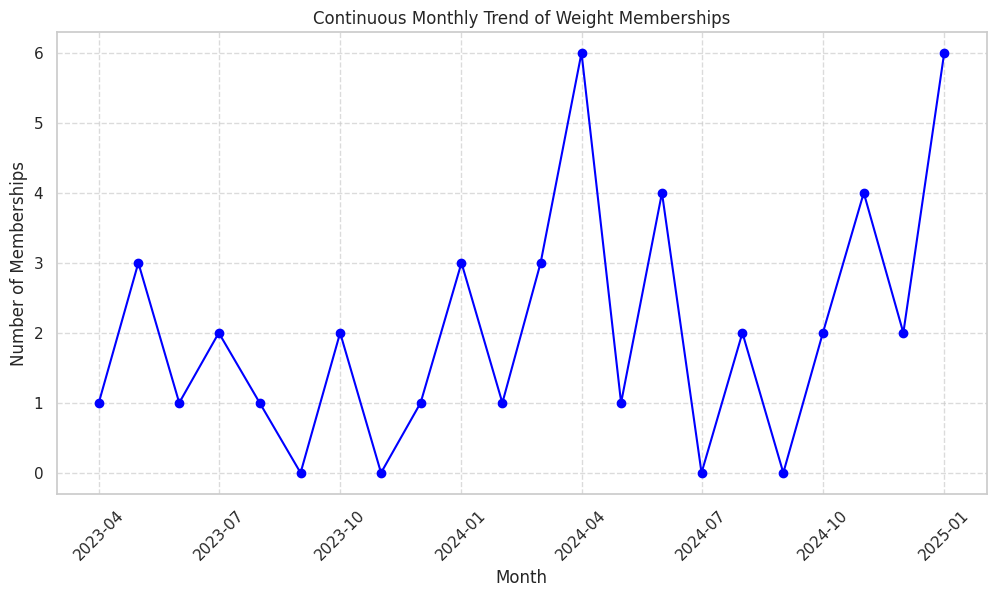

In [60]:
# 3. Membership Trend

weight_memberships['JoinYear'] = weight_memberships['JoinYear'].astype(int)
weight_memberships['JoinMonth'] = weight_memberships['JoinMonth'].astype(int)

weight_memberships['JoinDate'] = pd.to_datetime(
    weight_memberships['JoinYear'].astype(str) + '-' + weight_memberships['JoinMonth'].astype(str) + '-01'
)

monthly_trend = weight_memberships.groupby('JoinDate').size()

full_date_range = pd.date_range(start=monthly_trend.index.min(), end=monthly_trend.index.max(), freq='MS')
monthly_trend = monthly_trend.reindex(full_date_range, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='blue')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Memberships")
plt.title("Continuous Monthly Trend of Weight Memberships")

plt.yticks(range(0, int(max(monthly_trend.values)) + 1, 1))

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-61-01b3b8e2f807>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



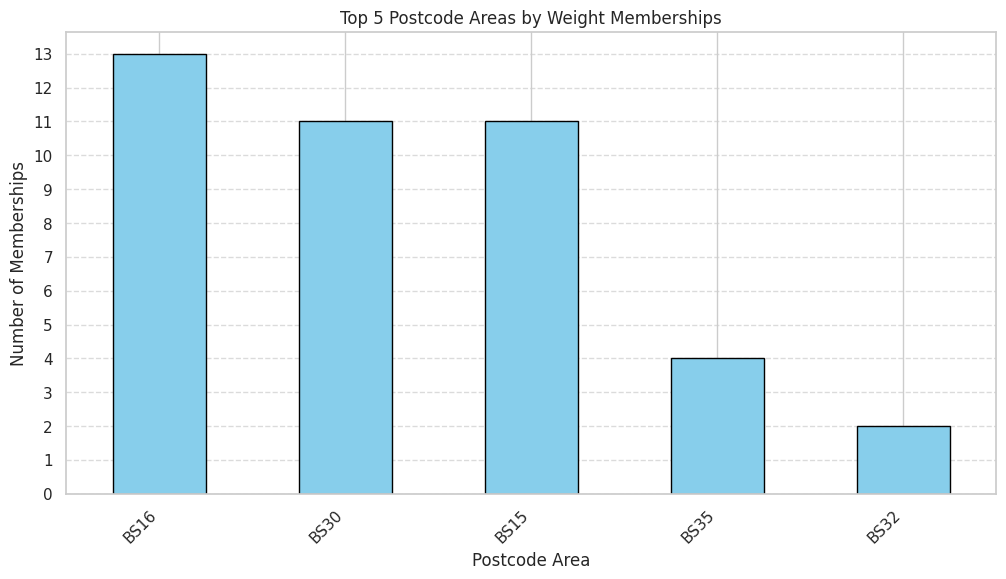

In [61]:
# 4. Postcode

weight_memberships['Postcode_Area'] = weight_memberships['Postcode'].str.split().str[0]

postcode_area_counts = weight_memberships['Postcode_Area'].value_counts()

top_postcode_areas = postcode_area_counts.head(5)

plt.figure(figsize=(12, 6))
top_postcode_areas.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 5 Postcode Areas by Weight Memberships")
plt.xlabel("Postcode Area")
plt.ylabel("Number of Memberships")
plt.xticks(rotation=45, ha='right')

plt.yticks(range(0, int(max(top_postcode_areas)) + 1, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Wellbeing**

<ipython-input-62-bd755f85e311>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



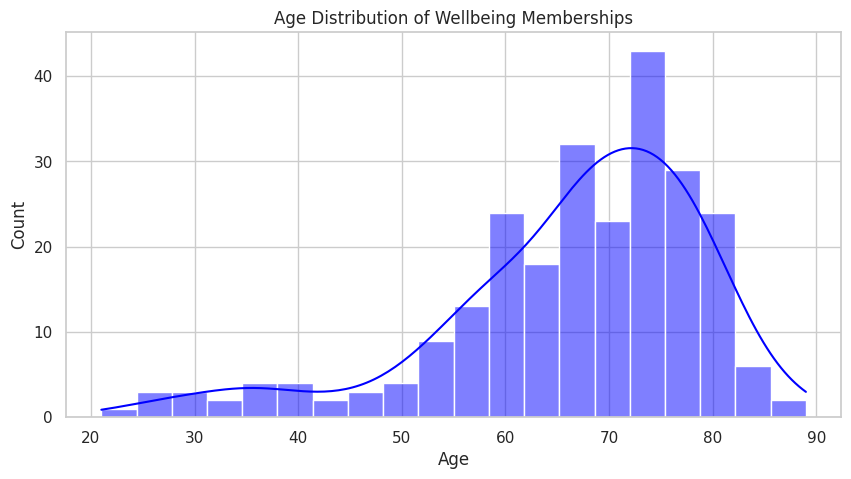

In [62]:
# 1. Age Distribution

wellbeing_memberships['Age'] = pd.to_numeric(wellbeing_memberships['Age'], errors='coerce')
wellbeing_memberships = wellbeing_memberships.dropna(subset=['Age'])

plt.figure(figsize=(10, 5))
sns.histplot(wellbeing_memberships['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Wellbeing Memberships")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

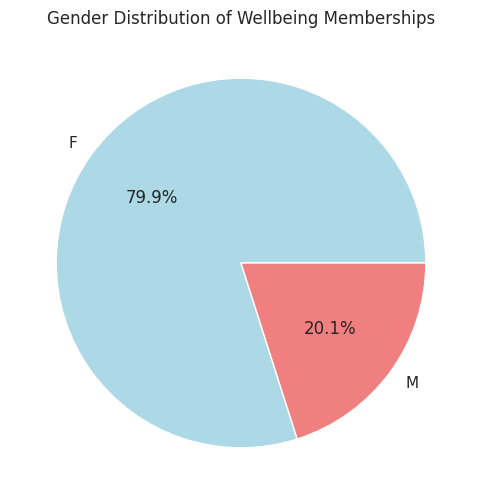

In [63]:
# 2. Gender Ratio

gender_counts = wellbeing_memberships['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.title("Gender Distribution of Wellbeing Memberships")
plt.show()

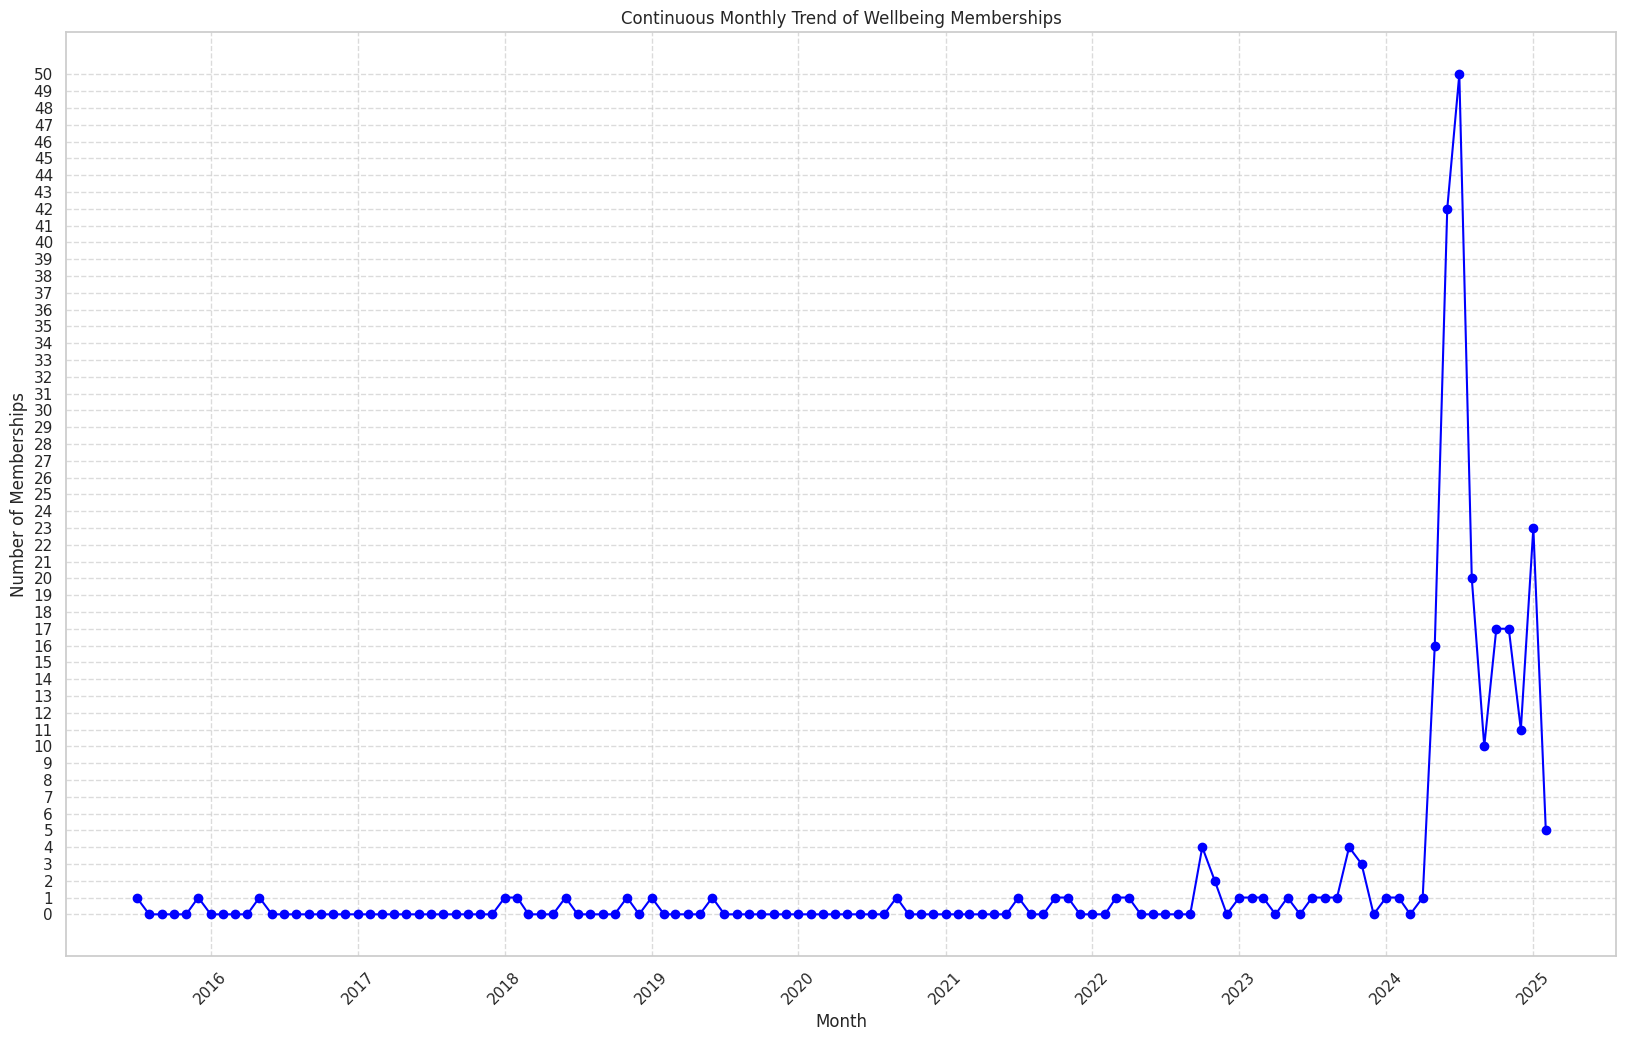

In [64]:
# 3. Membership Trend

wellbeing_memberships['JoinYear'] = wellbeing_memberships['JoinYear'].astype(int)
wellbeing_memberships['JoinMonth'] = wellbeing_memberships['JoinMonth'].astype(int)
wellbeing_memberships['JoinDate'] = pd.to_datetime(wellbeing_memberships['JoinYear'].astype(str) + '-' + wellbeing_memberships['JoinMonth'].astype(str) + '-01')
monthly_trend = wellbeing_memberships.groupby('JoinDate').size()
full_date_range = pd.date_range(start=monthly_trend.index.min(), end=monthly_trend.index.max(), freq='MS')
monthly_trend = monthly_trend.reindex(full_date_range, fill_value=0)
plt.figure(figsize=(20, 12))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Memberships")
plt.title("Continuous Monthly Trend of Wellbeing Memberships")
plt.yticks(range(0, int(max(monthly_trend.values)) + 1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

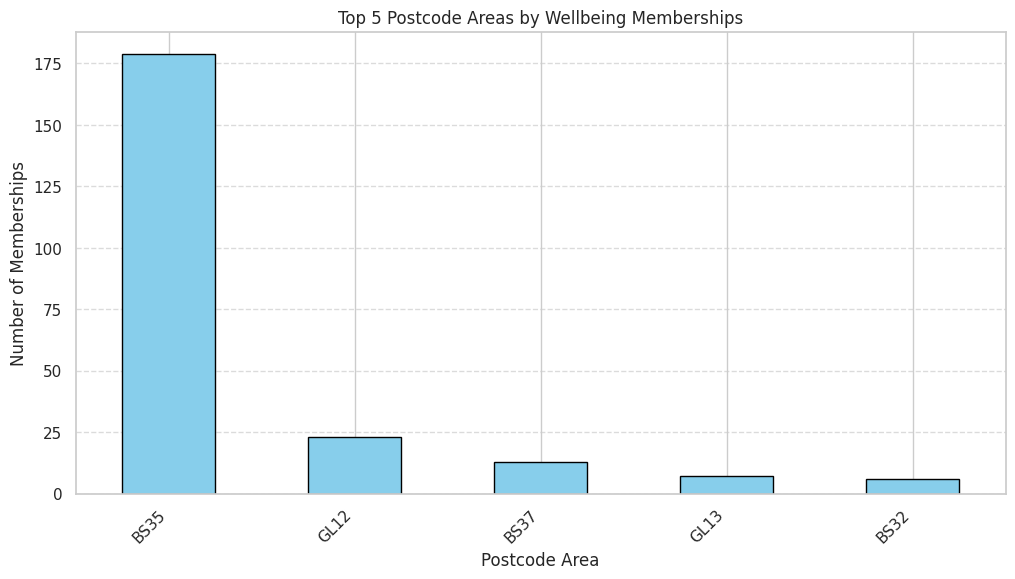

In [65]:
# 4. Postcode

wellbeing_memberships['Postcode_Area'] = wellbeing_memberships['Postcode'].str.split().str[0]
postcode_area_counts = wellbeing_memberships['Postcode_Area'].value_counts()
top_postcode_areas = postcode_area_counts.head(5)
plt.figure(figsize=(12, 6))
top_postcode_areas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Postcode Areas by Wellbeing Memberships")
plt.xlabel("Postcode Area")
plt.ylabel("Number of Memberships")
plt.xticks(rotation=45, ha='right')
max_value = int(max(top_postcode_areas))
step = max(1, max_value // 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Lor_referral**

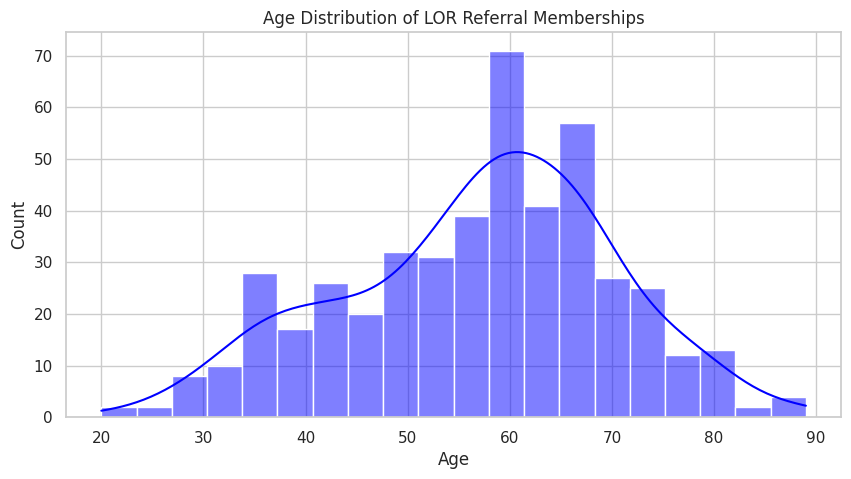

In [66]:
# 1. Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(lor_referral_memberships['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of LOR Referral Memberships")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

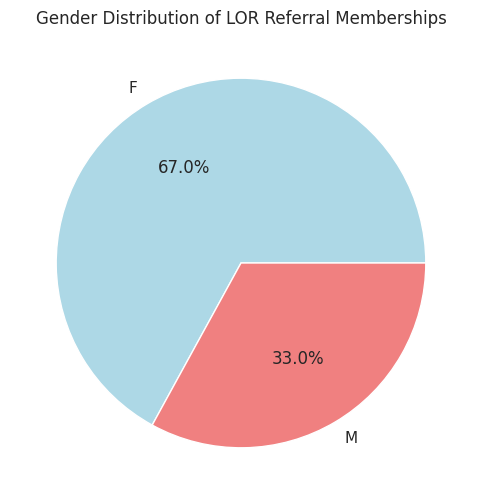

In [67]:
# 2. Gender Ratio

gender_counts = lor_referral_memberships['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.title("Gender Distribution of LOR Referral Memberships")
plt.show()

<ipython-input-68-a0e0b2297ce9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-a0e0b2297ce9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-a0e0b2297ce9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



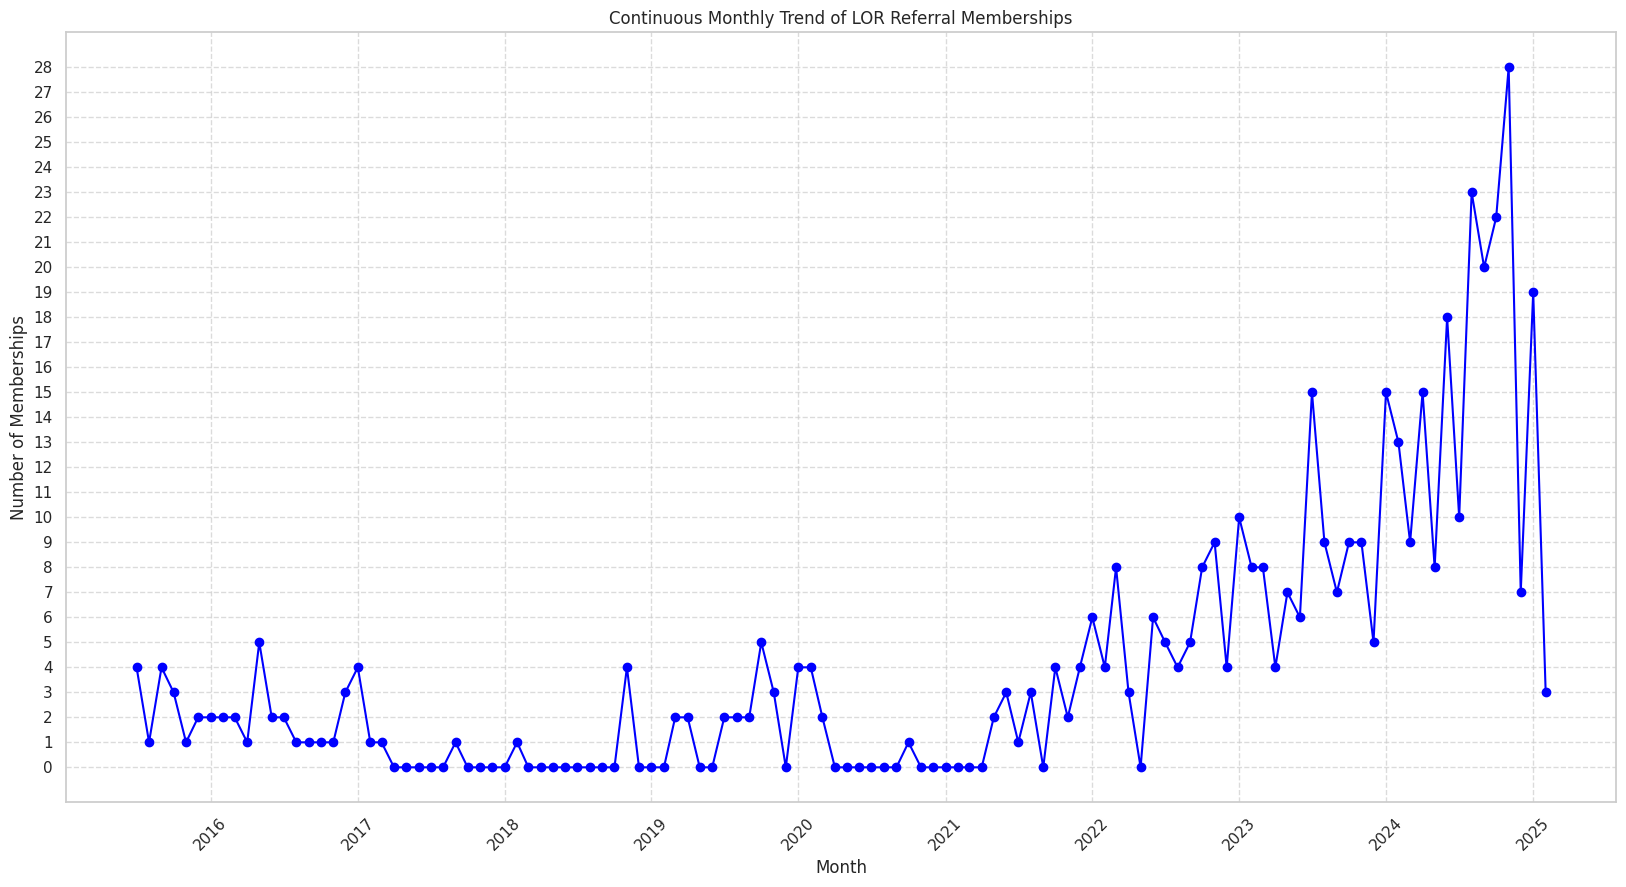

In [68]:
# 3. Membership Trend

lor_referral_memberships['JoinYear'] = lor_referral_memberships['JoinYear'].astype(int)
lor_referral_memberships['JoinMonth'] = lor_referral_memberships['JoinMonth'].astype(int)
lor_referral_memberships['JoinDate'] = pd.to_datetime(lor_referral_memberships['JoinYear'].astype(str) + '-' + lor_referral_memberships['JoinMonth'].astype(str) + '-01')
monthly_trend = lor_referral_memberships.groupby('JoinDate').size()
full_date_range = pd.date_range(start=monthly_trend.index.min(), end=monthly_trend.index.max(), freq='MS')
monthly_trend = monthly_trend.reindex(full_date_range, fill_value=0)
plt.figure(figsize=(20, 10))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Memberships")
plt.title("Continuous Monthly Trend of LOR Referral Memberships")
plt.yticks(range(0, int(max(monthly_trend.values)) + 1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<ipython-input-69-021a986a4652>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



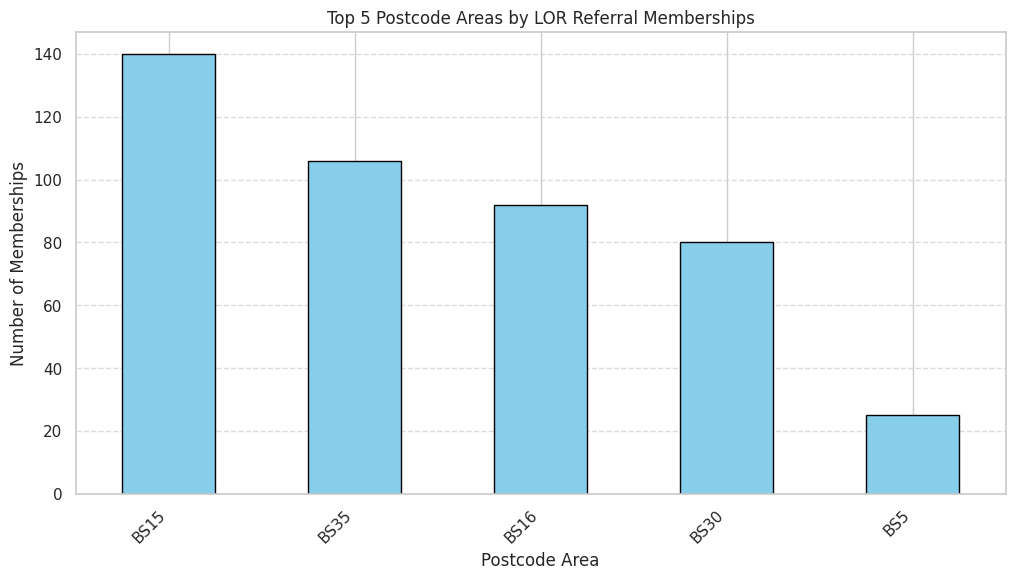

In [69]:
# 4. Postcode

lor_referral_memberships['Postcode_Area'] = lor_referral_memberships['Postcode'].str.split().str[0]
postcode_area_counts = lor_referral_memberships['Postcode_Area'].value_counts()
top_postcode_areas = postcode_area_counts.head(5)
plt.figure(figsize=(12, 6))
top_postcode_areas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Postcode Areas by LOR Referral Memberships")
plt.xlabel("Postcode Area")
plt.ylabel("Number of Memberships")
plt.xticks(rotation=45, ha='right')
max_value = int(max(top_postcode_areas))
step = max(1, max_value // 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()